# <u>**_Ordinal Regression Analysis of Highly Imbalanced Wine Quality DataSet_**<u>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **<u>___Objective___<u>**
- To conduct an ordinal regression analysis on a highly imbalanced wine quality dataset, focusing on evaluating feature relevance and its impact on specific target classes. 
- This involves creating pre-processed datasets, validating and optimizing various classifiers, and applying advanced hyperparameter tuning techniques to enhance model performance.

### **Import Data**

In [17]:
original=pd.read_csv('WineQT ----------ordinal regression.csv')
train_set=pd.read_csv('wine_train.csv')
test_set=pd.read_csv('wine_test.csv')

In [18]:
original.columns=original.columns.str.replace(' ','_')
train_set.columns=train_set.columns.str.replace(' ','_')
test_set.columns=test_set.columns.str.replace(' ','_')

In [19]:
# original.describe()

In [20]:
# train.describe()

In [21]:
#original.info()
#train_set.info()
#test_set.info()
#original.describe()
#train.describe()
#test.describe()

*Checking For Duplicates*

In [22]:
#original.duplicated().sum()----125
#train_set.duplicated().sum()----0
#test_set.duplicated().sum()-----0

In [23]:
original.drop_duplicates(inplace=True)

### <u>Dataset Descriptions and Notes</u>

 ___**Original Dataset**___
- **Null Values**: None
- **Data Points**: 1143
- **Data Types**: All independent features are of type `float64`
- **Target Variable**: Integer values ranging from 3 to 8

___**Train Set**___
- **Null Values**: None
- **Data Points**: 2056
- **Data Types**: All independent features are of type `float64`
- **Target Variable**: Integer values ranging from 3 to 8

___**Test Set**___
- **Null Values**: None
- **Data Points**: 1372
- **Data Types**: All independent features are of type `float64`
- **Target Variable**: Not available

___**<u>Notes and Recommendations</u>**___
- **Synthetic Data**: The `train_set` may be a synthetic dataset created from the `original` dataset. Consider whether to use the datasets individually or concatenate the `train` and `original` datasets.
- **Dropping ID Columns**: Drop the ID columns to keep track of the original index wherever possible.
- **Data Distribution Check**: Examine the distribution of data in both the `train` and `original` datasets to evaluate the possibility of concatenation.
- **Target Encoding**: Encode the target values for both datasets so that the minimum target value starts from 0. This encoding might simplify Cohen's Kappa metric evaluation.


*drop the id columns*

*encode the target variable-: To be done after data preprocessing to ensure usability of original values for EDA*

In [24]:
original=original.drop('Id',axis=1)
train_set=train_set.drop('Id',axis=1)
test_set=test_set.drop('Id',axis=1)

### <u>Exploratory Data Analysis</u>

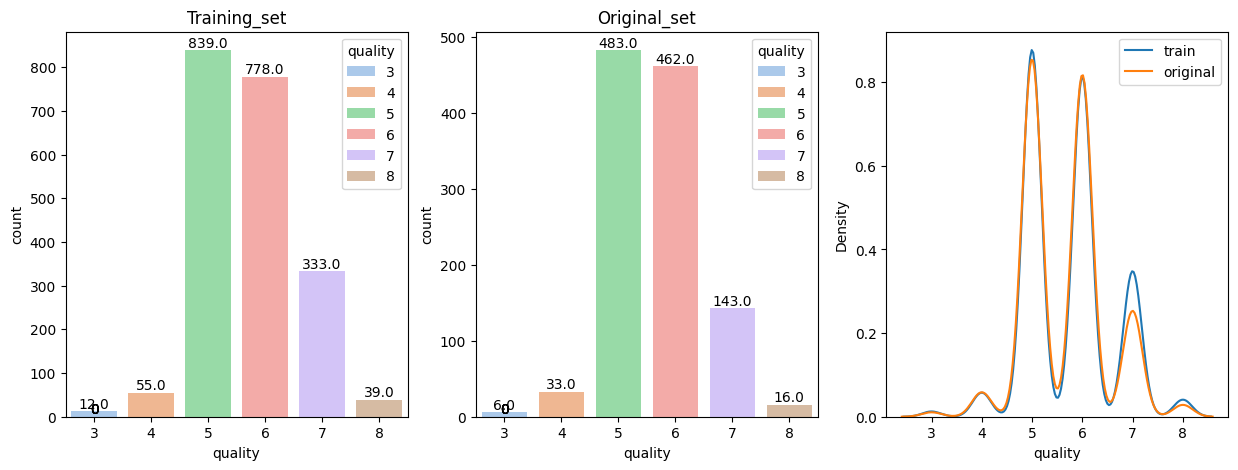

In [11]:
# target data dist
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i,set in enumerate([train_set,original]):
    ax=sns.countplot(data=set,x='quality',hue='quality',ax=axes[i],palette=sns.color_palette('pastel',6))
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2,p.get_height(),p.get_height(),ha='center',va='bottom')
    if i==0:
        axes[i].set_title('Training_set')
    else:
        axes[i].set_title('Original_set')
sns.kdeplot(data=train_set,x='quality',ax=axes[2],label='train')
sns.kdeplot(data=original,x='quality',ax=axes[2],label='original')
plt.legend()

### <u>Observations and Recommendations</u>

___**Similarity Between Datasets**___
- Both the `train` and `original` datasets show similarity, suggesting that the `train` set might be a synthetic dataset derived from the `original` dataset for machine learning purposes.

___**Class Imbalance</u>**___
- **High Class Imbalance**: The distributions reveal significant class imbalance.
  - **Majority Classes**: Class 5 and Class 6 are the majority classes. A baseline model may easily identify instances pertaining to these classes.
  - **Minority Class**: Class 3 appears to be the minority class.<br><br>
- **Handling Imbalance**:
  - **SMOTE or Tomek Links**: Consider using these techniques to address class imbalance.
  - **Limitations**: Sampling techniques might have limitations if the minimum instances for the minority class are not met. In such cases, combining the minority class with the subsequent class based on value counts might be sensible to achieve a balanced dataset.

___**Feature Engineering and Selection**___
- **Feature Engineering**: Create new features or transform existing ones to enhance the model's ability to discriminate between classes.
- **Feature Selection**: Select the most relevant features that significantly impact the target variable to reduce noise and improve model performance.
- These steps help improve the input data quality before addressing class imbalance issues.

___**Cross-Validation Strategy**___
- **Stratified K-Fold Cross-Validation**: Ensures each fold maintains the same class distribution as the original dataset, crucial for preserving class representation.
- **Repeated Stratified K-Fold Cross-Validation**: Repeats stratified K-fold multiple times with different random splits for more reliable performance estimates and reduced variability.
- These strategies help ensure consistent model evaluation and enhance generalizability and reliability.



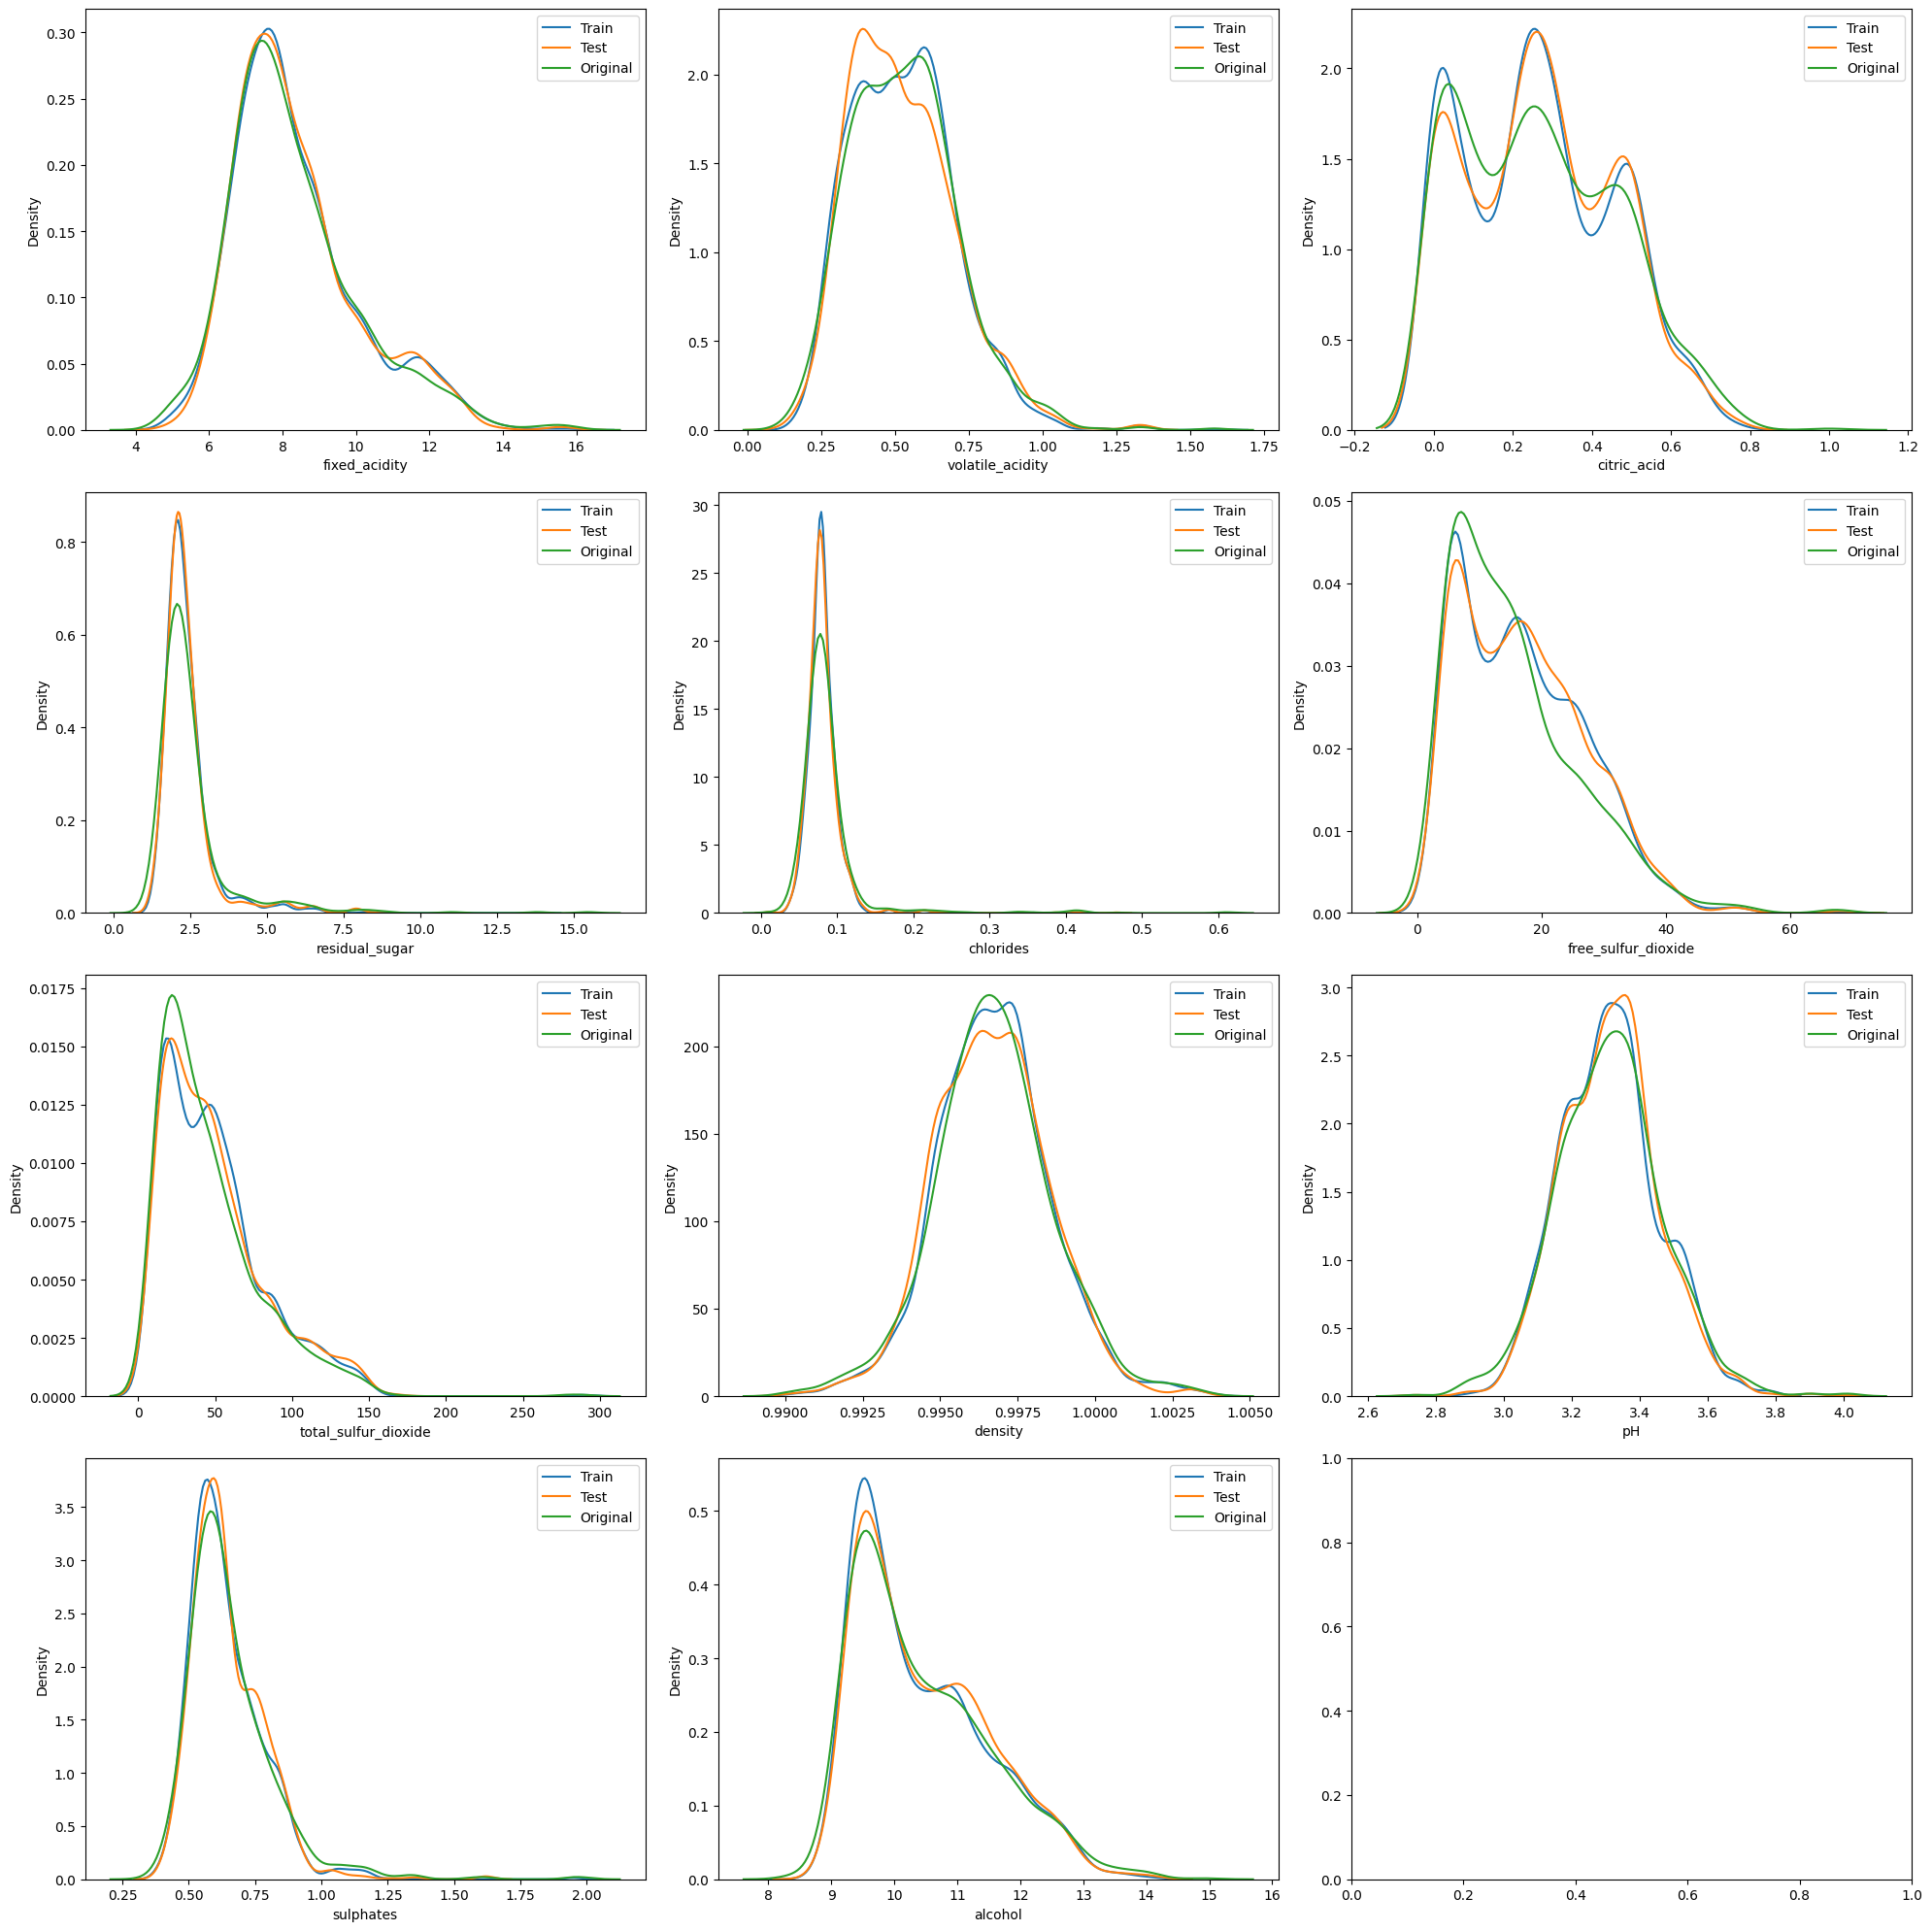

In [37]:
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(20,20))
axes=axes.flatten()
for i,feature in enumerate(original.drop('quality',axis=1)):

    sns.kdeplot(data=train_set,x=feature,ax=axes[i],label='Train',common_norm=False)
    sns.kdeplot(data=test_set,x=feature,ax=axes[i],label='Test',common_norm=False)
    sns.kdeplot(data=original,x=feature,ax=axes[i],label='Original',common_norm=False)
    axes[i].legend()
plt.tight_layout()
plt.show()
    


___**Data Distribution**___

The overall distribution of data appears quite similar among all three datasets (train, test, and original). This consistency suggests that the datasets are representative of each other.

___**Observations**___

- **Positive Skewness**: Heavy positive skewness is observed in the distribution of chlorides and residual sugars, indicating the presence of extreme outliers.
- **Outlier Handling**: Outliers should be carefully handled to assess their relevance and potential impact on data integrity.

___**Recommendations**___

- **Concatenation of Datasets**: The similar data distributions in both the train set and the original dataset suggest that concatenating them could benefit machine learning models. Combining these datasets can increase the number of instances available for training, potentially improving model performance and adaptability.


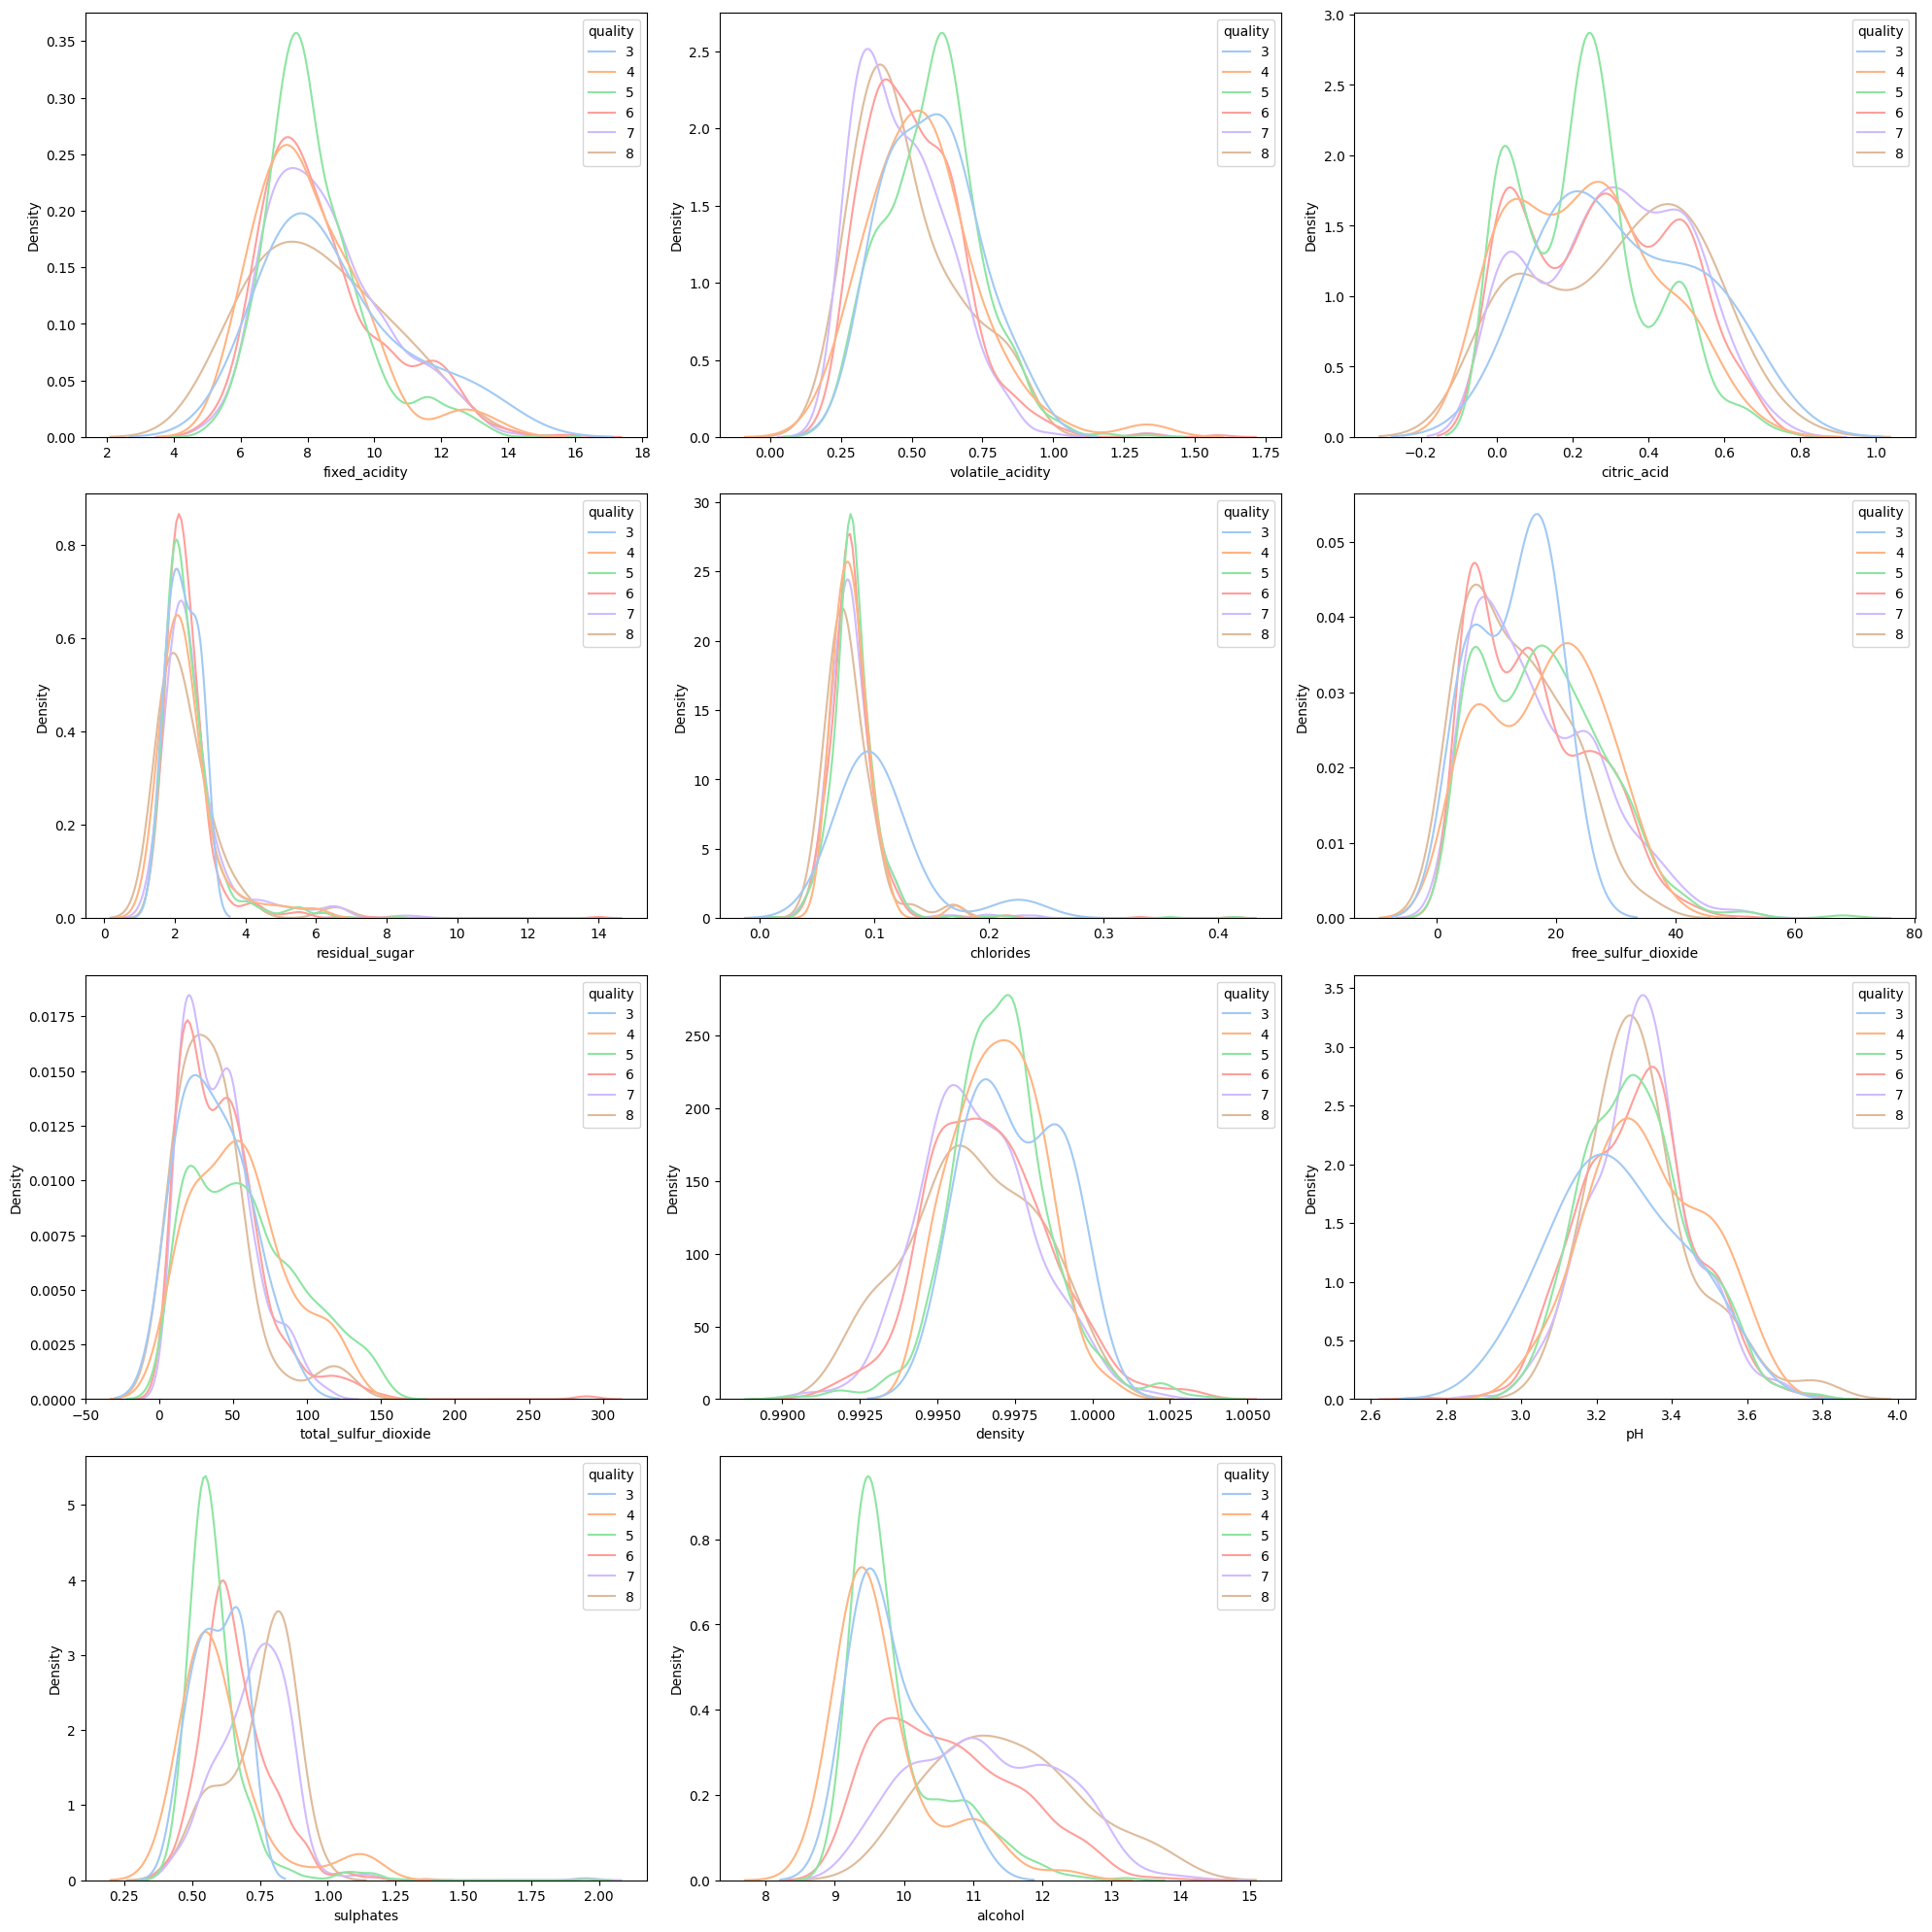

In [31]:
# distplot
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(20,20))
axes=axes.flatten()
label=original.drop('quality',axis=1).columns
for i,feature in enumerate(original.drop('quality',axis=1)):
    sns.kdeplot(data=train_set,x=feature,hue='quality',ax=axes[i],palette=sns.color_palette('pastel',6),common_norm=False)

for i in range(len(original.drop('quality',axis=1).columns),len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

In [166]:
for i in train_set['quality'].unique():
    print('Quality-',i,'-----',train_set[train_set['quality']==i]['chlorides'].mean())

Quality- 6 ----- 0.08092673521850897
Quality- 7 ----- 0.08140240240240237
Quality- 5 ----- 0.08277949940405242
Quality- 4 ----- 0.08069090909090909
Quality- 8 ----- 0.0785128205128205
Quality- 3 ----- 0.10633333333333332


### <u>Identifying Features to Efficiently Detect Minority Classes</u>

Identifying features that can efficiently detect minority classes, such as class 3, involves pinpointing characteristics in their distribution that distinguish them from other classes. These distinct characteristics could include wider ranges of values, significant differences in central tendencies (mean or median), or unique patterns in their distribution.

___**Chlorides Feature**___

The chloride feature shows a clear distinction in its density distribution with respect to category 3 in our target variable Quality. Assessing the height of the curve is not relevant to identify its distinctive nature as the height of the curve is influenced by the number of data points corresponding to the particular class, which is the lowest for class 3. Instead, we can assess the horizontal positioning and the spread of the distribution.

- The mean chloride level for quality 3 is 0.106, while the mean chloride for other qualities is around 0.08.
- Quality 5 has a few outliers with relatively low density compared to quality 3, which spreads around its own unique position.

**Conclusion**: Retaining this feature is necessary and should be considered in case other processes such as feature selection or PCA are performed.


### <u>Feature Discriminatory Power and Model Preference</u>

___**Observations**___

None of the features independently hold any discriminatory power for any specific quality. This observation suggests the possibility of non-linear and complex relationships among different features that contribute to the distinct variation among different qualities.

___**Model Recommendation**___

Given these complexities, a tree-based model might be more preferable compared to a linear model. Tree-based models, such as decision trees or random forests, are capable of capturing non-linear interactions and complex relationships between features, which could be beneficial in distinguishing between different quality classes.


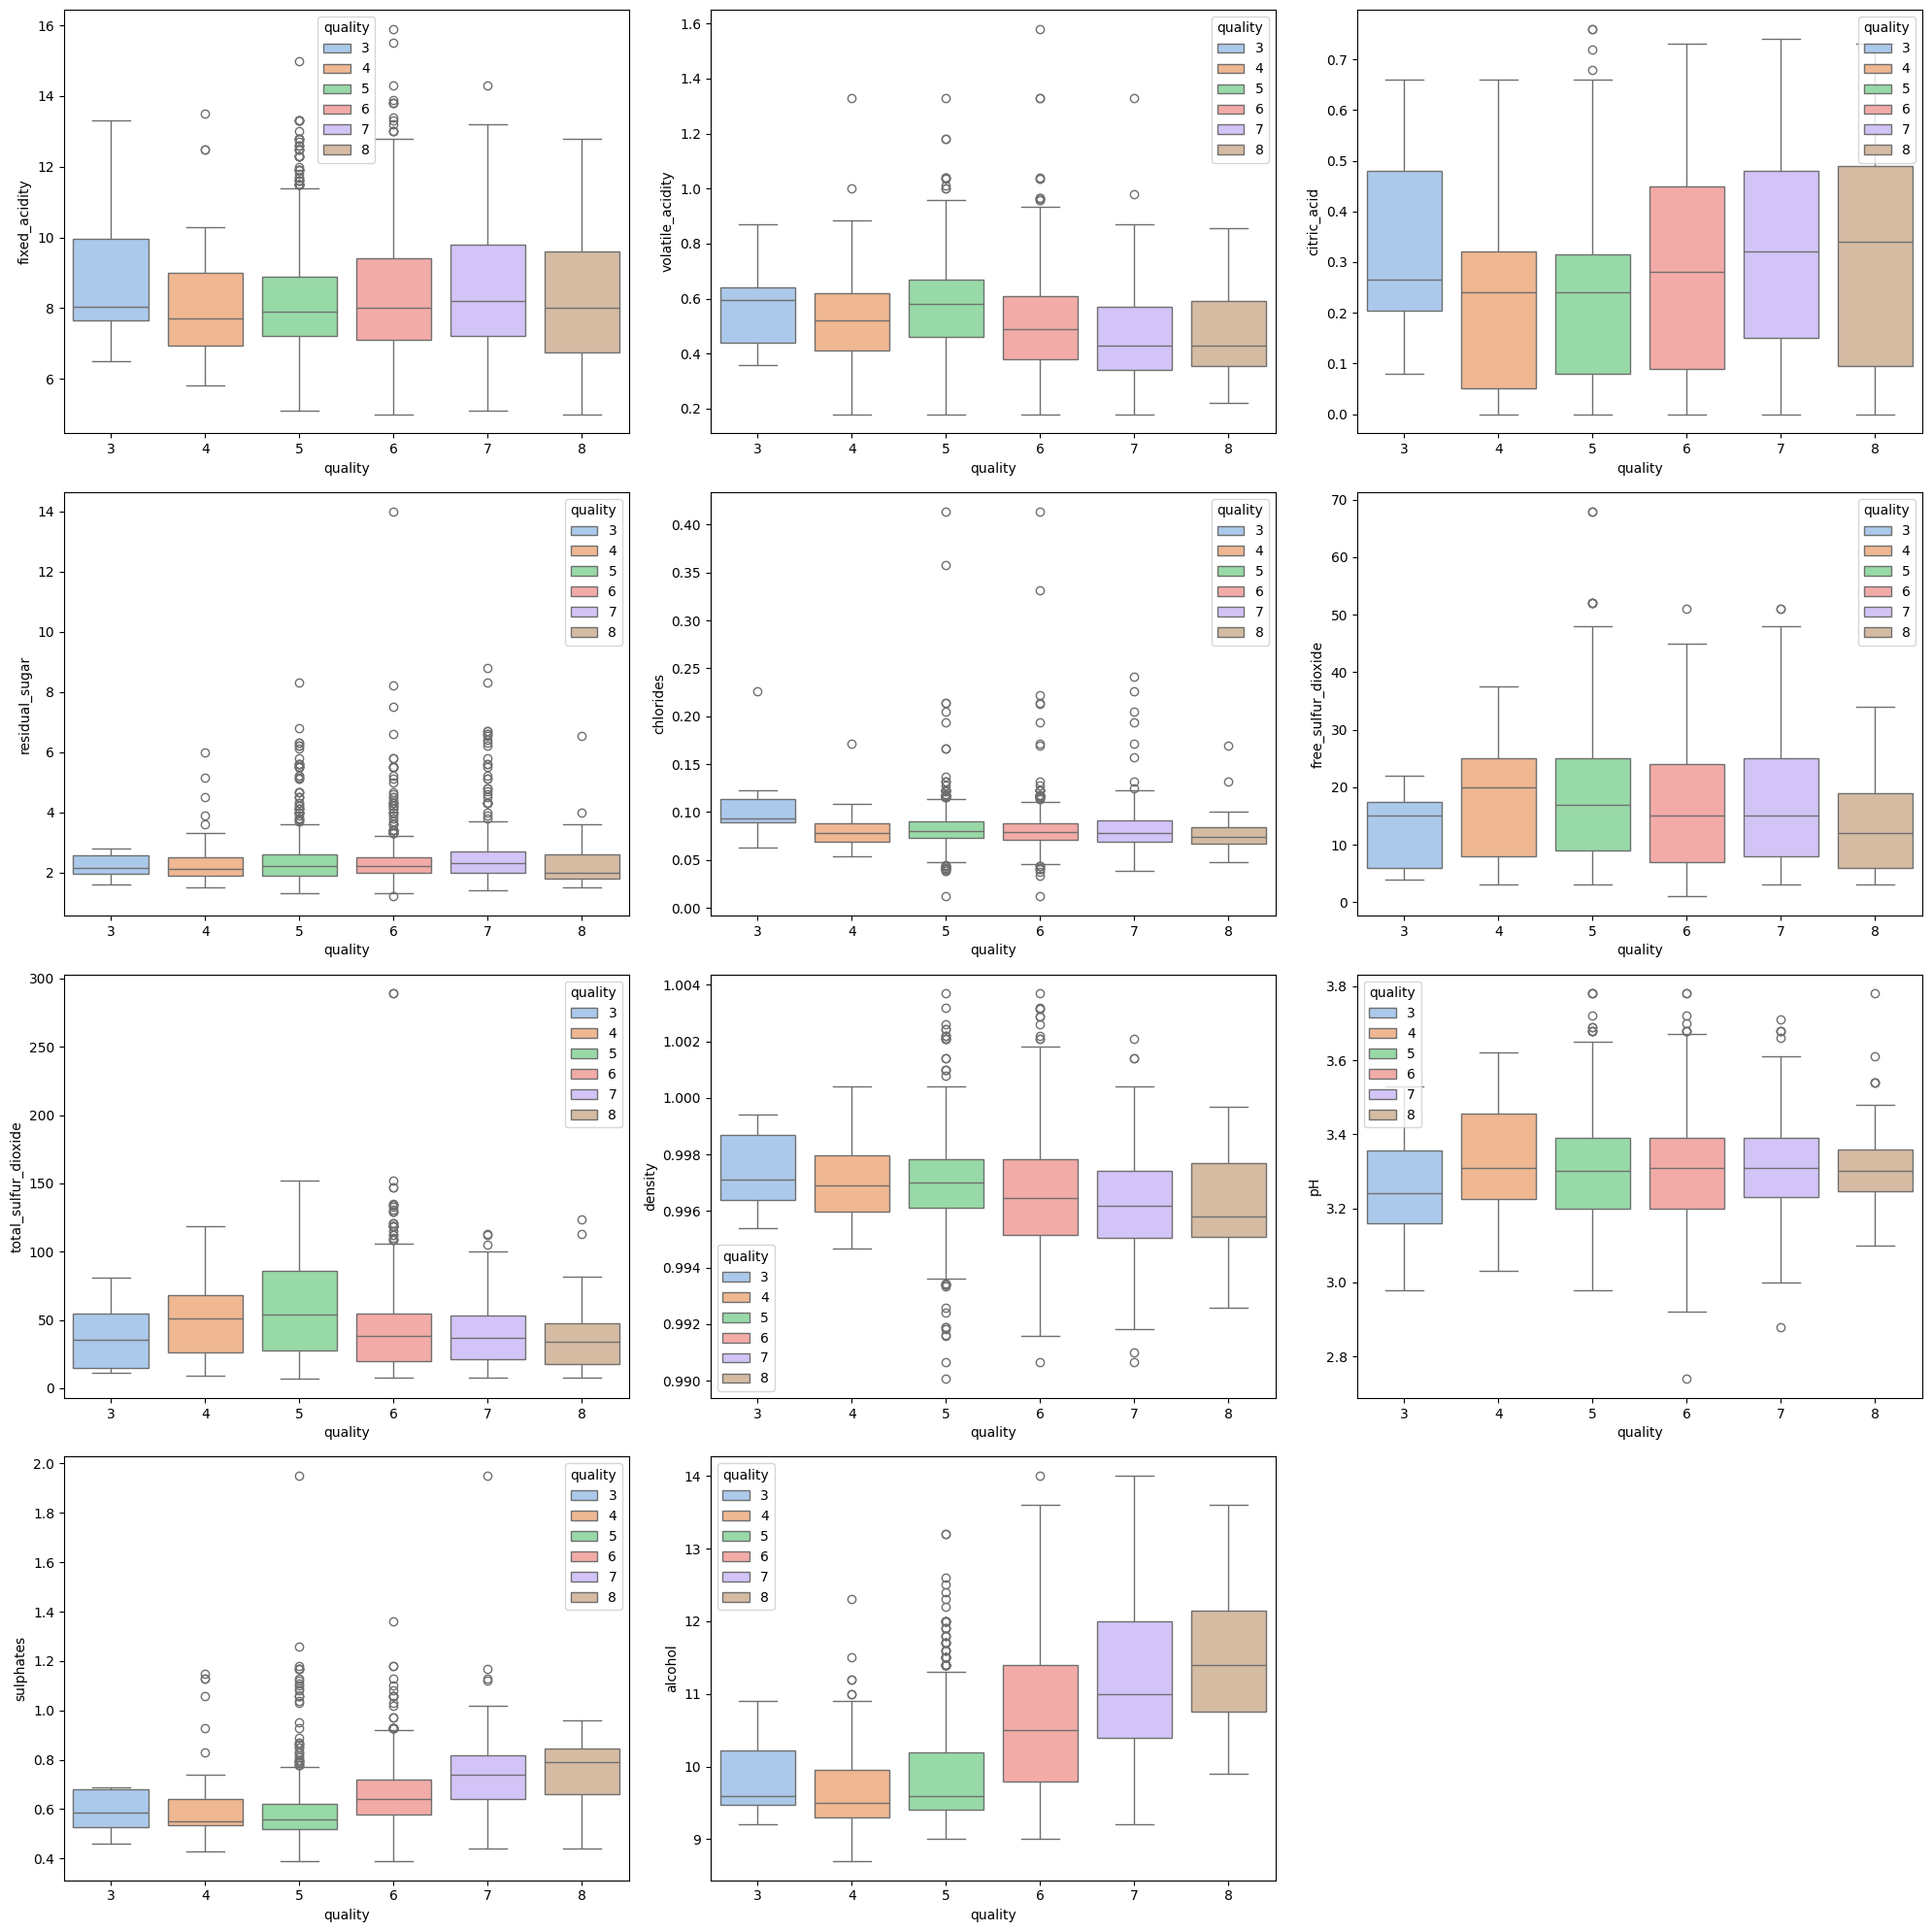

In [33]:
# boxplot visualization to help identify features that could be feature engineered
# boxplot
fig,axes=plt.subplots(nrows=4,ncols=3,figsize=(20,20))
axes=axes.flatten()
for i,feature in enumerate(original.drop('quality',axis=1)):
    sns.boxplot(data=train_set,y=feature,x='quality',hue='quality',ax=axes[i],palette=sns.color_palette('pastel',6))

for i in range(len(original.drop('quality',axis=1).columns),len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()



### <u>Observed Relationships and Recommendations</u>

___**Observations**___

- **Inverse Linear Relation**: A minute inverse linear relation can be observed between density and the quality of wine.
- **Significant Linear Relation**: A significant linear relation is observed between alcohol content and quality, indicating that a higher alcohol content generally corresponds to a higher quality of wine.
- **Irregularities for Category 3**: The observed relations show some irregularities for category 3 wine, which could be attributed to the lack of significant representation of data points for this quality.

___**Recommendations**___

- **Focus on Cohen's Kappa Score**: Improving the Cohen's Kappa score could be an appropriate objective given the dataset's imbalance and lack of significant variability. Enhancing this metric would help in better aligning predicted and actual classes, particularly for the minority classes.


### <u>Observations on Wine Quality Data</u>

___**Relationships Between Features and Wine Quality**___
- **Density and Quality**: A slight inverse linear relationship is observed between the density and quality of wine.
- **Alcohol and Quality**: A significant positive linear relationship is noted, indicating that higher alcohol content corresponds to higher wine quality.
- **Category 3 Irregularities**: Category 3 wines show some irregularities in the observed relationships. This may be due to a lack of significant data points for quality 3.

___**Recommendations**___
- **Cohen Kappa Score Improvement**: Given the heavy class imbalance and lack of variability in the dataset, improving the Cohen Kappa score should be a key objective.


### <u>Identifying the Outliers</u>
- based on mean
- based on iqr
- using isolation forest

### **Based on Mean**

In [25]:
from sklearn.model_selection import train_test_split
X=train_set.drop('quality',axis=1)
y=train_set['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [549]:
means=X_train.mean()
stds=3*X_train.std()
outlier_mask=(np.abs(X_train-means)>stds).any(axis=1)
X_train_outlier_removed=X_train[~outlier_mask]
y_train_outlier_removed=y_train[~outlier_mask]
outlier_mask_test=(np.abs(X_test-means)>stds).any(axis=1)
X_test_outlier_removed=X_test[~outlier_mask_test]
y_test_outlier_removed=y_test[~outlier_mask_test]

In [550]:
from scipy.stats import zscore
zscore_train=X_train.copy()
zscore_train=zscore_train.apply(zscore)
#print(zscore_train.abs().ge(3).sum())
#zscore_train[~zscore_train.abs().ge(3).any(axis=1)]
#y_train[~zscore_train.abs().ge(3).any(axis=1)]
#print('\n\n\n')
zscore_test=X_test.copy()
zscore_test=zscore_test.apply(zscore)
#print(zscore_test.abs().ge(3).sum())
#zscore_test[~zscore_test.abs().ge(3).any(axis=1)]
#y_test[~zscore_test.abs().ge(3).any(axis=1)]

- X_train has 142
- X_test has 36 outliers

### **Based on IQR**

In [551]:
q1=np.percentile(X_train,25,axis=0)
q3=np.percentile(X_train,75,axis=0)
iqr=q3-q1
outlier_mask_train=(((X_train)<q1-iqr*1.5) | (((X_train)>q3+iqr*1.5))).any(axis=1)

# X_train_oulier_removed=X_train[~outlier_mask_train]
# y_train_oulier_removed=y_train[~outlier_mask_train]
outlier_mask_test=(((X_test)<q1-iqr*1.5) | (((X_test)>q3+iqr*1.5))).any(axis=1)

# X_test_oulier_removed=X_test[~outlier_mask_test]
# y_test_oulier_removed=y_test[~outlier_mask_test]

- X_train has 345
- X_test has 102 outliers

In [26]:
#concating the training set and original set
data_resampled=pd.concat([train_set,original],axis=0)
data_resampled.reset_index(inplace=True)
data_resampled=data_resampled.drop('index',axis=1)

### *Analysis of Skewness and Kurtosis in the data*

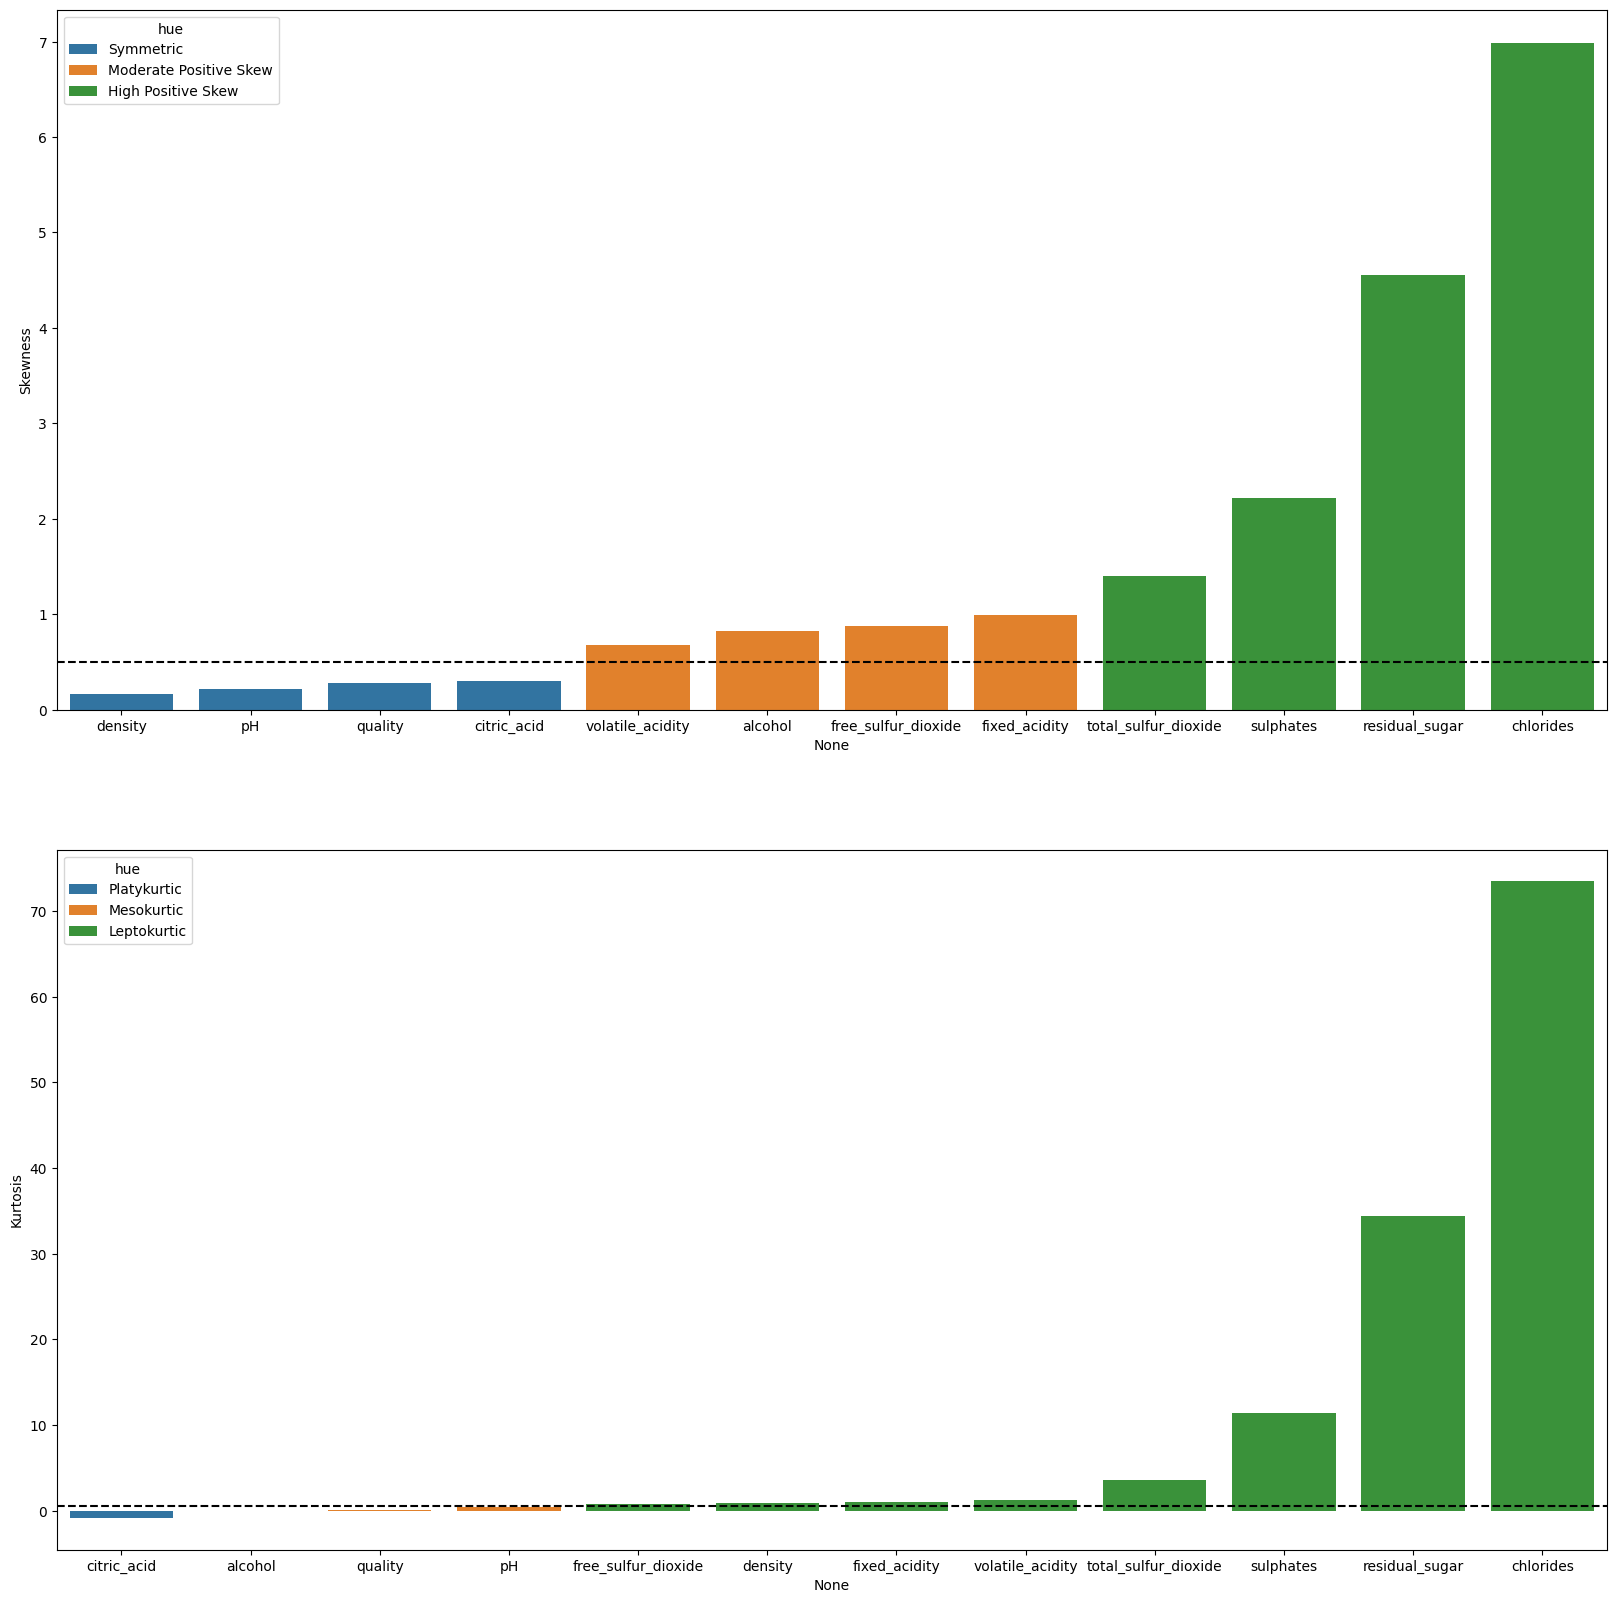

In [45]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(20,20))
axes=axes.flatten()

data_resampled_skew=pd.DataFrame(data_resampled.skew())
data_resampled_kurt=pd.DataFrame(data_resampled.kurt())

data_resampled_skew['hue'] = data_resampled_skew[0].apply(lambda x: 
    'Symmetric' if -0.5 <= x <= 0.5 else 
    'Moderate Positive Skew' if 0.5 < x <= 1 else 
    'Moderate Negative Skew' if -1 <= x < -0.5 else 
    'High Positive Skew' if x > 1 else 
    'High Negative Skew'
)

data_resampled_kurt['hue'] = data_resampled_kurt[0].apply(lambda x: 
    'Mesokurtic' if -0.5 <= x <= 0.5 else 
    'Platykurtic' if x < -0.5 else 
    'Leptokurtic' if x > 0.5 else 
    'Undefined'
)
data_resampled_kurt=data_resampled_kurt.sort_values(by=0,ascending=True)
data_resampled_skew=data_resampled_skew.sort_values(by=0,ascending=True)

for i,stat in enumerate([data_resampled_skew,data_resampled_kurt]):
    sns.barplot(data=stat,x=stat.index,y=0,hue='hue',ax=axes[i])
    axes[i].axhline(0.5,linestyle='--',color='black')
    if i==0:
        axes[i].set_ylabel('Skewness')
    else:
        axes[i].set_ylabel('Kurtosis')

#### *Evaluating data normalizations to handle skewess and kurtosis*

- Upon visualizing the barplots it can be observed that 4 features total sulfur dioxide, sulphates, residual sugar and chlorides appears to be
- highly skewed and exhibit leptokurtic behaviour
- The skeweness can be handled by normalizing the distributions.
- possible transformations- logarithmic, boxcox, quantile transformation, StandardScaler, sqrt transformation

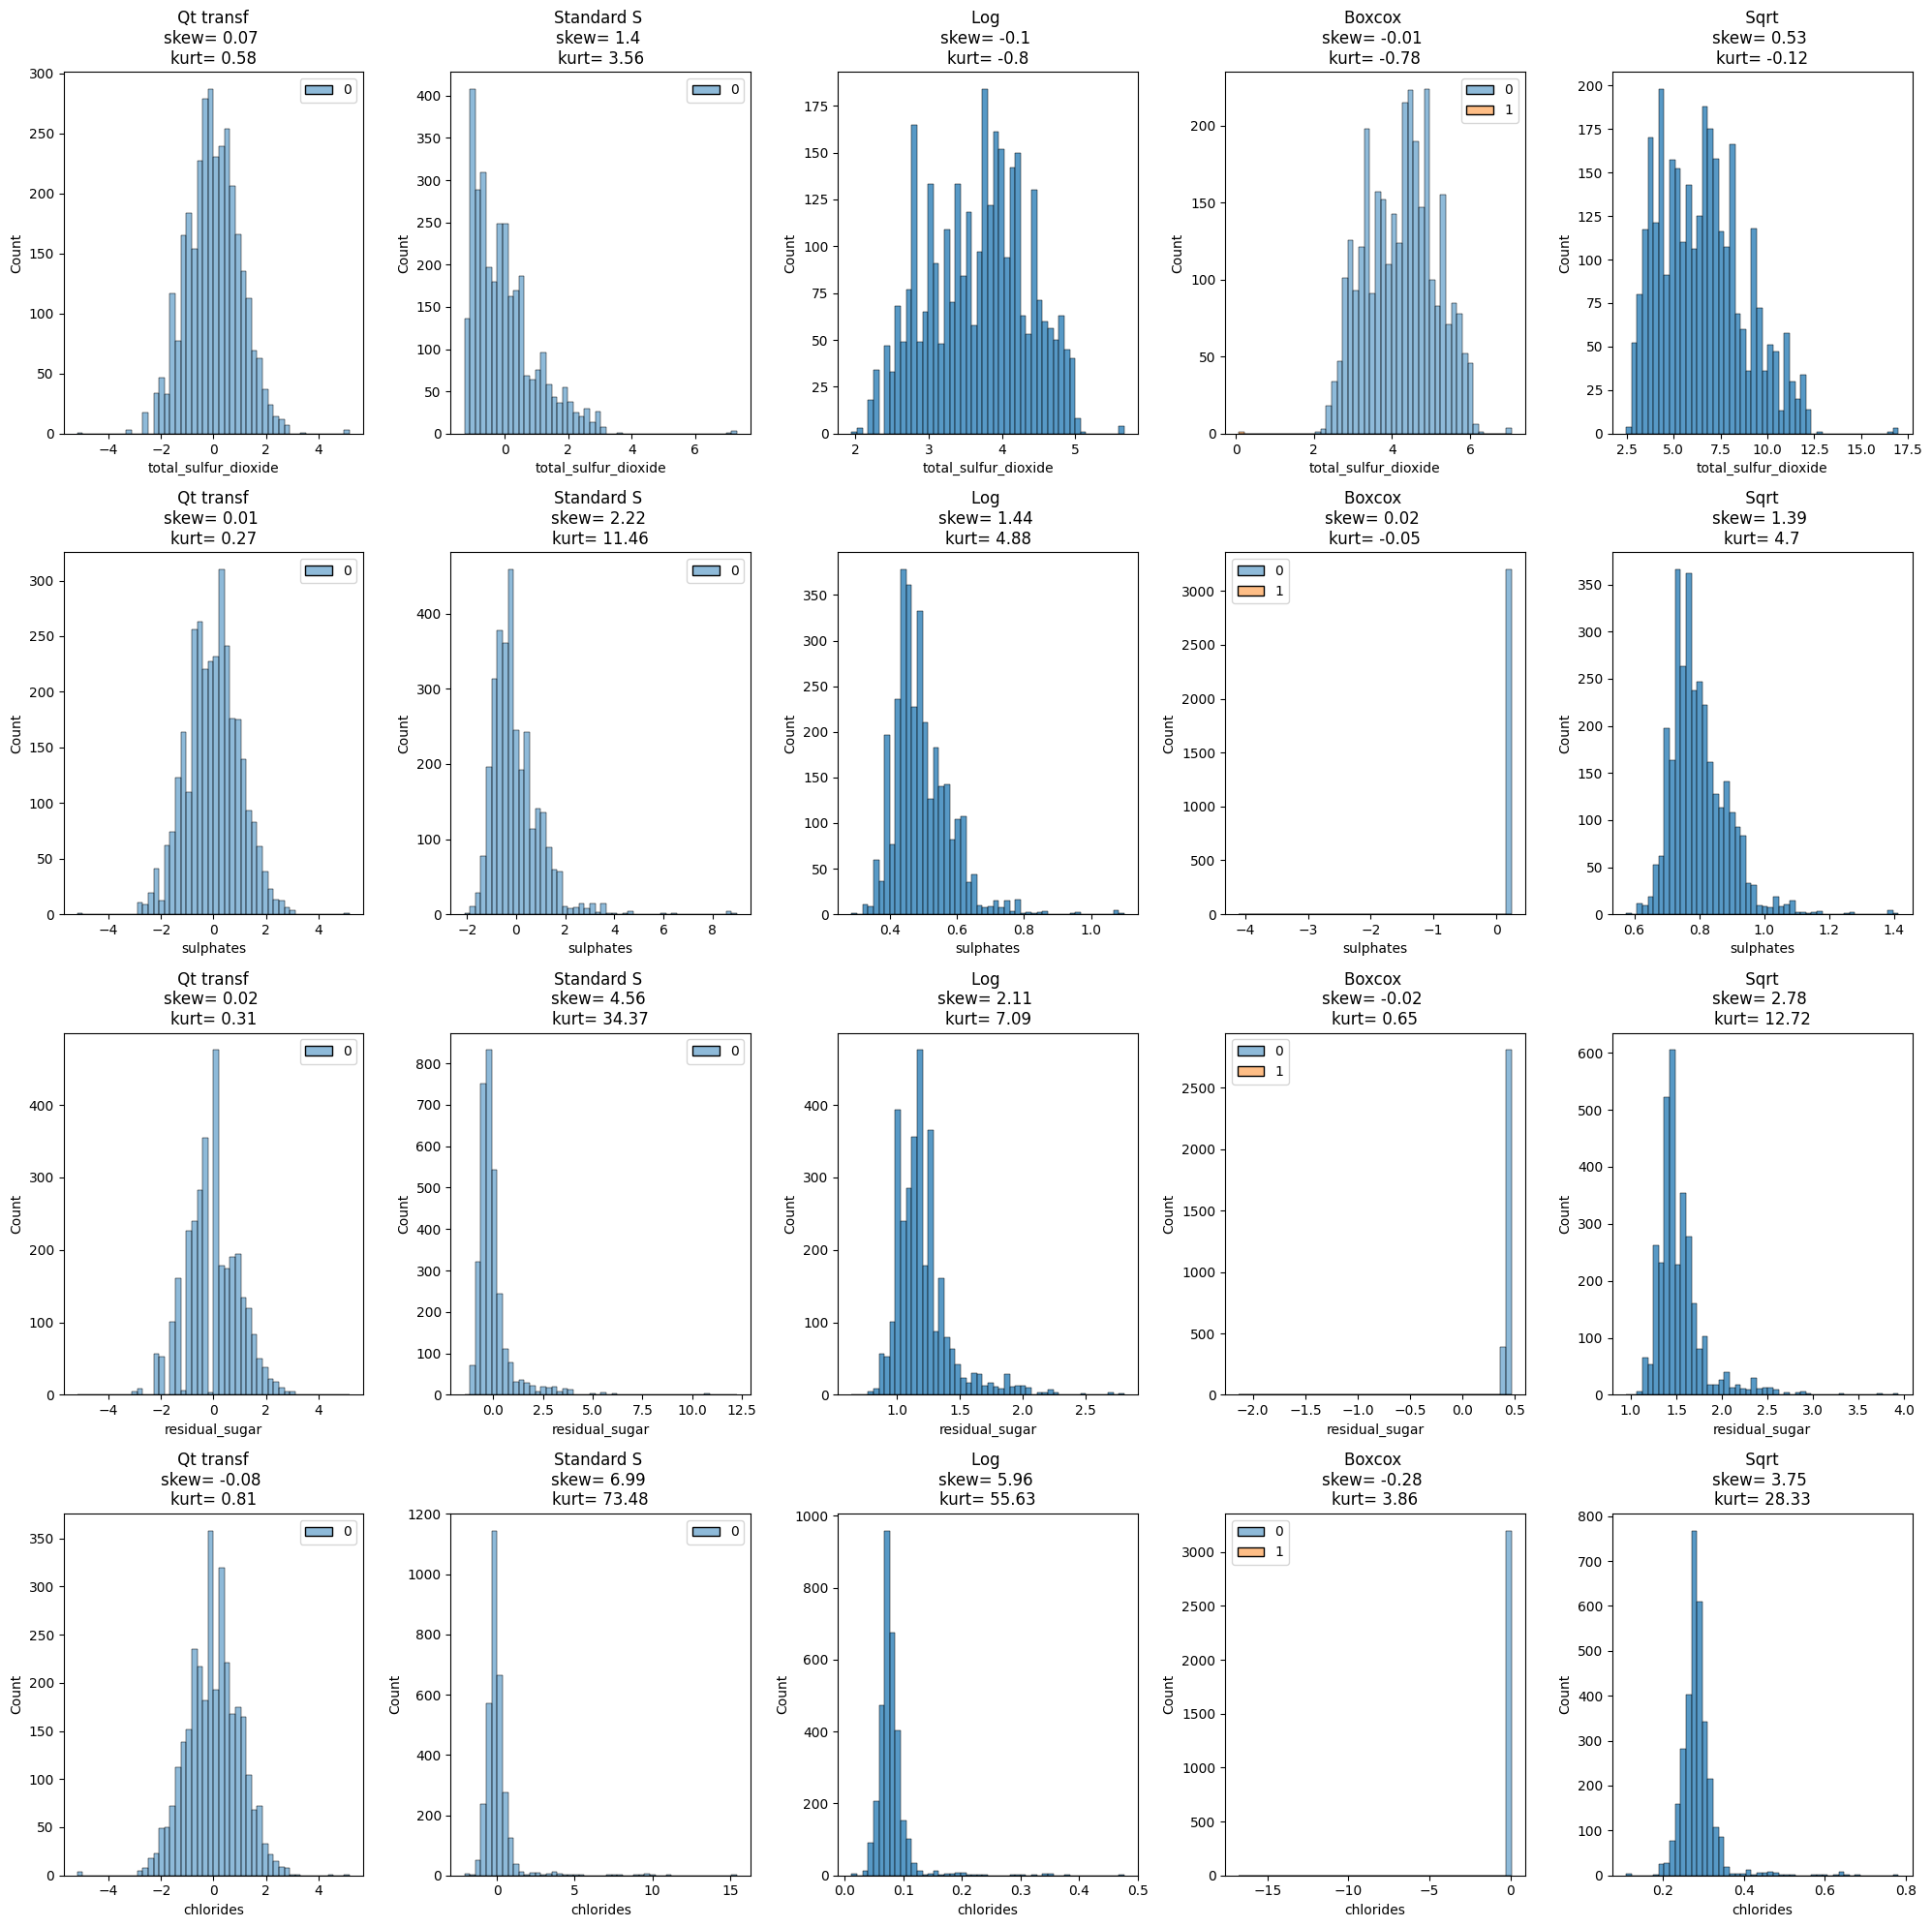

In [267]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from scipy.stats import boxcox


features_non_norm=['total_sulfur_dioxide', 'sulphates','residual_sugar',
       'chlorides']
fig,axes=plt.subplots(nrows=len(features_non_norm),ncols=5,figsize=(20,20))

for i,feature in enumerate(features_non_norm):

    # Quantile dist
    scaler=QuantileTransformer(output_distribution='normal')
    scaled=scaler.fit_transform(data_resampled[[feature]])
    sns.histplot(scaled,bins=50,ax=axes[i,0])
    scaled=pd.DataFrame(scaled)
    axes[i,0].set_title(f' Qt transf \nskew= {np.round(scaled[0].skew(),2)} \nkurt= {np.round(scaled[0].kurt(),2)}')
    axes[i,0].set_xlabel(feature)
    
    # standard scaling
    scaler=StandardScaler()
    scaled=scaler.fit_transform(data_resampled[[feature]])
    sns.histplot(scaled,bins=50,ax=axes[i,1])
    scaled=pd.DataFrame(scaled)
    axes[i,1].set_title(f'Standard S \nskew= {np.round(scaled[0].skew(),2)} \nkurt= {np.round(scaled[0].kurt(),2)}')
    axes[i,1].set_xlabel(feature)
    
    # logarithmic
    log_scaled=np.log(data_resampled[feature]+1)
    sns.histplot(log_scaled,bins=50,ax=axes[i,2])
    log_scaled=pd.DataFrame(log_scaled)
    axes[i,2].set_title(f'Log \nskew= {np.round(log_scaled[feature].skew(),2)} \nkurt= {np.round(log_scaled[feature].kurt(),2)}')
    axes[i,2].set_xlabel(feature)
    
    #boxcox
    sns.histplot(boxcox(data_resampled[feature]+1),bins=50,ax=axes[i,3])
    box_cox=pd.DataFrame(boxcox(data_resampled[feature]+1)[0])
    axes[i,3].set_title(f'Boxcox \nskew= {np.round(box_cox[0].skew(),2)} \nkurt= {np.round(box_cox[0].kurt(),2)}')
    axes[i,3].set_xlabel(feature)
    
    #sqrt
    sns.histplot(np.sqrt(data_resampled[feature]),bins=50,ax=axes[i,4])
    sqrt=pd.DataFrame(np.sqrt(data_resampled[feature]))
    axes[i,4].set_title(f' Sqrt \nskew= {np.round(sqrt[feature].skew(),2)} \nkurt= {np.round(sqrt[feature].kurt(),2)}')
    axes[i,4].set_xlabel(feature)
    

plt.tight_layout()



### *Quantile transformation provides desirable results in terms of obtaining a normally distributed feature*

<Axes: >

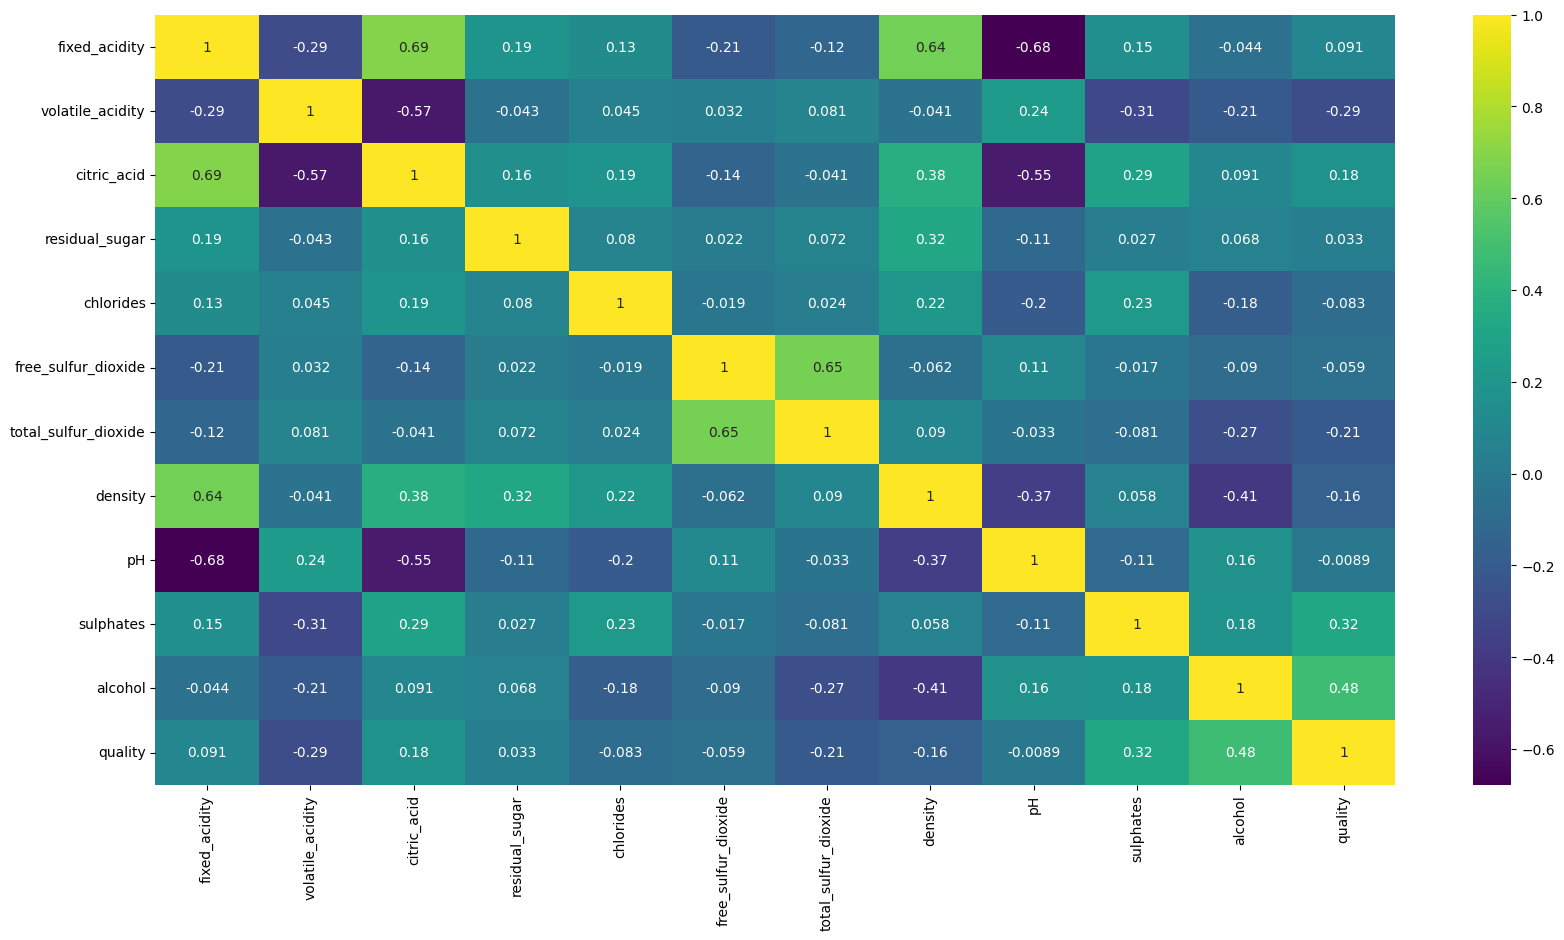

In [270]:
plt.figure(figsize=(20,10))
sns.heatmap(data_resampled.corr(),cmap='viridis',annot=True)

In [51]:
data_resampled.corr()[data_resampled.corr().abs().ge(0.4)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,NaN,0.687184,NaN,NaN,NaN,NaN,0.640241,-0.677651,NaN,NaN,NaN
volatile_acidity,NaN,1.000000,-0.569957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric_acid,0.687184,-0.569957,1.000000,NaN,NaN,NaN,NaN,NaN,-0.553513,NaN,NaN,NaN
residual_sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.647198,NaN,NaN,NaN,NaN,NaN
total_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,0.647198,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.640241,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,-0.408734,NaN
pH,-0.677651,NaN,-0.553513,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


### <u>Observed Correlation</u>

- **Fixed Acidity and Citric Acid**: Moderate positive correlation of `0.6872`
- **Fixed Acidity and Density**: Moderate positive correlation of `0.6402`
- **Fixed Acidity and pH**: Moderate negative correlation of `-0.6770`
- **Volatile Acidity and Citric Acid**: Moderate negative correlation of `-0.5699`
- **Free Sulfur Dioxide and Total Sulfur Dioxide**: Moderate positive correlation of `0.6470`
- **pH and Fixed Acidity**: Moderate negative correlation of `-0.6776`
- **pH and Citric Acid**: Moderate negative correlation of `-0.5535`


## <u>**MODEL TRAINING**</u>

### <u>Baseline validation for training dataset</u>
- The datasets only require scaling thus no need for any pipeline usage

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=train_set.drop('quality',axis=1)
y=train_set['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

encoder_target=LabelEncoder()
y_train=encoder_target.fit_transform(y_train)
y_test=encoder_target.transform(y_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import cohen_kappa_score,log_loss,accuracy_score

models=[('LogisticRegression',LogisticRegression()),('SVC',SVC(probability=True)),('Random_Forest_Classifier',RandomForestClassifier(random_state=42)),
            ('XGB_Classifier',xgb.XGBClassifier(random_state=42,objective='multi:softmax',num_class=6,verbosity=0)),
            ('LGB_Classifier',lgb.LGBMClassifier(random_state=42,objective='multiclass',num_class=6,verbosity=-1))]

accuracy_scores=[]
cohen_kappa_scores=[]
logloss=[]
model=[]

for i in models:
    model.append(i[0])
    i[1].fit(X_train,y_train)
    accuracy_scores.append(accuracy_score(y_test,i[1].predict(X_test)))
    cohen_kappa_scores.append(cohen_kappa_score(y_test,i[1].predict(X_test),weights='quadratic'))
    logloss.append(log_loss(y_test,i[1].predict_proba(X_test)))

baseline_validation_0=pd.DataFrame({'Models':model,'Accuracy_score':accuracy_scores,'Cohen_score':cohen_kappa_scores,'Logloss':logloss})
baseline_validation_0

,Models,Accuracy_score,Cohen_score,Logloss
0,LogisticRegression,0.558252,0.394277,1.041669
1,SVC,0.555825,0.402117,1.030226
2,Random_Forest_Classifier,0.563107,0.427062,1.270388
3,XGB_Classifier,0.543689,0.379270,1.343431
4,LGB_Classifier,0.570388,0.405857,1.338561


### <u>**Model Performance Analysis on resampled dataset(combining original and training set)**<u>

Based on the baseline validation results:

- **LGBM Classifier**: Shows the highest accuracy of `57.038%`.
- **Random Forest Classifier**: Shows the second highest accuracy of `56.3107%`.

### <u>**Performance Metrics**</u>

- **Cohen's Kappa**: The Random Forest model has the highest Cohen's Kappa score, indicating better agreement between predicted and actual labels compared to other models.

- **Logloss**: Both the LGBM and Random Forest models exhibit higher logloss values, suggesting that these models might be overfitting to the training data. This implies lower generalization power and poor model calibration.

- **Other Models**: Logistic Regression and SVC show lower scores across all metrics.

Overall, while the LGBM and Random Forest models perform well in terms of accuracy and Cohen's Kappa score, their higher logloss values highlight potential overfitting issues. The Logistic Regression and SVC models have generally lower performance metrics.


### <u>Performing Different Sampling Techniques</u>

#### *Handling Data Imbalance*

In this section, we will explore the following sampling techniques:
- **Oversampling**
- **Undersampling**
- **Both Oversampling and Undersampling**


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=data_resampled.drop('quality',axis=1)
y=data_resampled['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

encoder_target=LabelEncoder()
y_train=encoder_target.fit_transform(y_train)
y_test=encoder_target.transform(y_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)


*Regular dataset with no resampling*

In [90]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import cohen_kappa_score,log_loss,accuracy_score

models=[('LogisticRegression',LogisticRegression()),('SVC',SVC(probability=True)),('Random_Forest_Classifier',RandomForestClassifier(random_state=42)),
            ('XGB_Classifier',xgb.XGBClassifier(random_state=42,objective='multi:softmax',num_class=6,verbosity=0)),
            ('LGB_Classifier',lgb.LGBMClassifier(random_state=42,objective='multiclass',num_class=6,verbosity=-1))]

accuracy_scores=[]
cohen_kappa_scores=[]
logloss=[]
model=[]

for i in models:
    model.append(i[0])
    i[1].fit(X_train,y_train)
    accuracy_scores.append(accuracy_score(y_test,i[1].predict(X_test)))
    cohen_kappa_scores.append(cohen_kappa_score(y_test,i[1].predict(X_test),weights='quadratic'))
    logloss.append(log_loss(y_test,i[1].predict_proba(X_test)))

baseline_validation_1=pd.DataFrame({'Models':model,'Accuracy_score':accuracy_scores,'Cohen_score':cohen_kappa_scores,'Logloss':logloss})


*Oversampled dataset using SMOTE*

In [91]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=data_resampled.drop('quality',axis=1)
y=data_resampled['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

encoder_target=LabelEncoder()
y_train=encoder_target.fit_transform(y_train)
y_test=encoder_target.transform(y_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)


# oversampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import cohen_kappa_score,log_loss,accuracy_score

models=[('LogisticRegression_os',LogisticRegression()),('SVC_os',SVC(probability=True)),('Random_Forest_Classifier_os',RandomForestClassifier(random_state=42)),
            ('XGB_Classifier_os',xgb.XGBClassifier(random_state=42,objective='multi:softmax',num_class=6,verbosity=0)),
            ('LGB_Classifier_os',lgb.LGBMClassifier(random_state=42,objective='multiclass',num_class=6,verbosity=-1))]

accuracy_scores=[]
cohen_kappa_scores=[]
logloss=[]
model=[]

for i in models:
    model.append(i[0])
    i[1].fit(X_train,y_train)
    accuracy_scores.append(accuracy_score(y_test,i[1].predict(X_test)))
    cohen_kappa_scores.append(cohen_kappa_score(y_test,i[1].predict(X_test),weights='quadratic'))
    logloss.append(log_loss(y_test,i[1].predict_proba(X_test)))

baseline_validation_2=pd.DataFrame({'Models':model,'Accuracy_score':accuracy_scores,'Cohen_score':cohen_kappa_scores,'Logloss':logloss})


*Undersampled dataset using TomekLinks*

In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=data_resampled.drop('quality',axis=1)
y=data_resampled['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

encoder_target=LabelEncoder()
y_train=encoder_target.fit_transform(y_train)
y_test=encoder_target.transform(y_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)


# undersampling
from imblearn.under_sampling import TomekLinks,RandomUnderSampler
#rus = RandomUnderSampler(sampling_strategy='auto')
#X_train, y_train = rus.fit_resample(X_train, y_train)

resampler=TomekLinks(sampling_strategy='auto')
X_train, y_train = resampler.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import cohen_kappa_score,log_loss,accuracy_score

models=[('LogisticRegression_us',LogisticRegression()),('SVC_us',SVC(probability=True)),('Random_Forest_Classifier_us',RandomForestClassifier(random_state=42)),
            ('XGB_Classifier_us',xgb.XGBClassifier(random_state=42,objective='multi:softmax',num_class=6,verbosity=0)),
            ('LGB_Classifier_us',lgb.LGBMClassifier(random_state=42,objective='multiclass',num_class=6,verbosity=-1))]

accuracy_scores=[]
cohen_kappa_scores=[]
logloss=[]
model=[]

for i in models:
    model.append(i[0])
    i[1].fit(X_train,y_train)
    accuracy_scores.append(accuracy_score(y_test,i[1].predict(X_test)))
    cohen_kappa_scores.append(cohen_kappa_score(y_test,i[1].predict(X_test),weights='quadratic'))
    logloss.append(log_loss(y_test,i[1].predict_proba(X_test)))

baseline_validation_3=pd.DataFrame({'Models':model,'Accuracy_score':accuracy_scores,'Cohen_score':cohen_kappa_scores,'Logloss':logloss})

*Oversampled and Undersampled dataset*

In [93]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=data_resampled.drop('quality',axis=1)
y=data_resampled['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

encoder_target=LabelEncoder()
y_train=encoder_target.fit_transform(y_train)
y_test=encoder_target.transform(y_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)


# oversampling
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)

# undersampling
from imblearn.under_sampling import TomekLinks,RandomUnderSampler
#rus = RandomUnderSampler(sampling_strategy='auto')
#X_train, y_train = rus.fit_resample(X_train, y_train)

resampler=TomekLinks(sampling_strategy='auto')
X_train, y_train = resampler.fit_resample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb

from sklearn.metrics import cohen_kappa_score,log_loss,accuracy_score

models=[('LogisticRegression_os_us',LogisticRegression()),('SVC_os_us',SVC(probability=True)),('Random_Forest_Classifier_os_us',RandomForestClassifier(random_state=42)),
            ('XGB_Classifier_os_us',xgb.XGBClassifier(random_state=42,objective='multi:softmax',num_class=6,verbosity=0)),
            ('LGB_Classifier_os_us',lgb.LGBMClassifier(random_state=42,objective='multiclass',num_class=6,verbosity=-1))]

accuracy_scores=[]
cohen_kappa_scores=[]
logloss=[]
model=[]

for i in models:
    model.append(i[0])
    i[1].fit(X_train,y_train)
    accuracy_scores.append(accuracy_score(y_test,i[1].predict(X_test)))
    cohen_kappa_scores.append(cohen_kappa_score(y_test,i[1].predict(X_test),weights='quadratic'))
    logloss.append(log_loss(y_test,i[1].predict_proba(X_test)))

baseline_validation_4=pd.DataFrame({'Models':model,'Accuracy_score':accuracy_scores,'Cohen_score':cohen_kappa_scores,'Logloss':logloss})

Undersampling reduces the number of instances available for training by decreasing the number of samples in the majority classes to match the number of instances in the minority class. This approach can lead to:

- **Loss of Information**: By significantly reducing the number of samples, there is a risk of losing valuable information that could be critical for the model's learning process.

- **Reduced Variability**: With fewer samples, the model may encounter insufficient variability, which can lead to overfitting and reduced generalization capability.

- **Trade-off**: While undersampling may improve the model’s ability to correctly identify instances of the minority class, it often comes at the expense of overall model performance due to the reduced amount of training data.

In this case, since class 0 has only 10 instances, undersampling the other classes to 10 samples each could lead to a loss of important data and potentially diminish the model’s ability to generalize well.


In [87]:
baseline_validation=pd.concat([baseline_validation_1,baseline_validation_2,baseline_validation_3,baseline_validation_4],axis=0)
baseline_validation.reset_index(inplace=True)
baseline_validation=baseline_validation.drop('index',axis=1)
baseline_validation.style.background_gradient()

,Models,Accuracy_score,Cohen_score,Logloss
0,LogisticRegression,0.562500,0.448073,1.038181
1,SVC,0.554688,0.462393,1.035643
2,Random_Forest_Classifier,0.592187,0.550066,1.117236
3,XGB_Classifier,0.568750,0.525679,1.193803
4,LGB_Classifier,0.578125,0.512462,1.237756
5,LogisticRegression_os,0.300000,0.340432,1.600761
6,SVC_os,0.400000,0.378764,1.326464
7,Random_Forest_Classifier_os,0.550000,0.489648,1.143677
8,XGB_Classifier_os,0.551562,0.485860,1.248565
9,LGB_Classifier_os,0.567187,0.548821,1.156390


### <u>**Evaluation on Model Performance and Sampling Techniques**</u>

___**Model Performance**___

- **RandomForestClassifier**: This model exhibits the highest accuracy and Cohen's Kappa score of 0.592 and 0.550, respectively. However, both oversampling and undersampling have negatively impacted the log loss, reducing the confidence in the probability predictions of the RandomForest model.

- **LGB Models**: LGB models perform better when undersampled, with the Cohen's Kappa score improving from 0.512 to 0.548. This indicates that undersampling can enhance LGB model performance in terms of agreement between predicted and actual labels.

- **XGB Models**: While undersampling improves accuracy for XGB models, it adversely affects the log loss. This suggests that while undersampling may help with classification accuracy, it may compromise the model's probability estimates.

- **Inference Based on model performances**:
    - XGB and LGB are gradinet boosting models that build trees sub-sequentially with each tree correcting the erros made by the previous ones. They are more sensitive to class imbalance as they tend to favour majority classes over minority classes while trying to improve the overall model performance. Resampling helps balance out the data distribution of the target classes represented in the datase by the dpeendent variable. Resampling can either aid the model to prioritize each class equally with the introduction of any minimal variance introduced into the dataset.
    - A more uniform error distribution would be ideally observed upon resampling the dataset.
Random Forest models use different subsets of the  dataset while model training and average out their predictions.They do not rely on error feedback. The model is less effected by the skewed behavior of the target classes distribution due to their ensemble approach. Any class imbalance can be handled to a certain extent by redirecting focus on specific important classes of the dataset by appropriately configuring tthe scale_pos_weight parameter og the model.
    - Possible negative attributes of resampling for booster models are mostly related to overfitting due to extreme similarities between the data records assosciated with the minority classes for XGB and LGB models.
    - Appropriate iterations and hyperparameter tuning can help make most of the resampling process 

___**Sampling Techniques**___

- **Combined Sampling**: Combining oversampling and undersampling seems to offer additional benefits for some models. It might balance the trade-offs between model performance and generalization.

___**Recommendations**___

- **Hyperparameter Tuning**: For better model performance, consider tuning LGB and XGB models using methods like GridSearch, Bayesian Optimization, or Optuna. These techniques can help find optimal hyperparameters and improve the models' ability to handle class imbalance.


## <u>Recommended Sampling Techniques for Models based on evaluation<u>

<u>**Model-Specific Recommendations**</u>

- **RandomForestClassifier**: Use the **original dataset**. This model performs best with the original data, and sampling techniques like oversampling or undersampling negatively affect its performance.

- **LGB (LightGBM)**: Apply **oversampling**. LGB models benefit from oversampling, which helps in improving their performance metrics, especially in handling class imbalances.

- **XGB (XGBoost)**: Utilize **undersampled** or **original dataset**. XGB models show improved accuracy with undersampling, though it may negatively impact log loss. Alternatively, using the original dataset might be a viable option depending on the specific performance trade-offs.



### <u>Leave-One-Feature-Out Analysis to Detect Features That May Negatively Impact Model Performance<u>

*Using models Random Forest Classifier, XGBClassifier and LGBMClassifier*

In [397]:
performance_metrics=['None']
for i in [RandomForestClassifier(random_state=42),xgb.XGBClassifier(random_state=42,verbosity=0),lgb.LGBMClassifier(random_state=42,verbosity=-1)]:
    model=i
    model.fit(X_train,y_train)
    performance_metrics.append(accuracy_score(y_test,model.predict(X_test)))
    performance_metrics.append(cohen_kappa_score(y_test,model.predict(X_test),weights='quadratic'))
    performance_metrics.append(log_loss(y_test,model.predict_proba(X_test)))
    

In [398]:
accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
removed_feature=[]
merge=[]
for index,i in enumerate(X_train.columns):
    model=RandomForestClassifier(random_state=42)
    model.fit(X_train.drop(i,axis=1),y_train)
    acc=accuracy_score(y_test,model.predict(X_test.drop(i,axis=1)))
    cks=cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic')
    log=log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1)))
    #print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
    #print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
    #print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))
    removed_feature.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)
    merge.append('merge_'+str(index))

validation_0=pd.DataFrame({'Feature_removed':removed_feature,'Acc_rf':accuracy_scores,'Cks_rf':cohen_kappa_scores,'Logloss_rf':logloss_scores,
                           'merge_column':merge})



In [399]:
accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
removed_feature=[]
merge=[]
for index,i in enumerate(X_train.columns):
    model=xgb.XGBClassifier(random_state=42)
    model.fit(X_train.drop(i,axis=1),y_train)
    acc=accuracy_score(y_test,model.predict(X_test.drop(i,axis=1)))
    cks=cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic')
    log=log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1)))
    #print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
    #print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
    #print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))
    removed_feature.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)
    merge.append('merge_'+str(index))

validation_1=pd.DataFrame({'merge_column':merge,'Acc_xgb':accuracy_scores,'Cks_xgb':cohen_kappa_scores,'Logloss_xgb':logloss_scores})



In [400]:
accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
removed_feature=[]
merge=[]
for index,i in enumerate(X_train.columns):
    model=lgb.LGBMClassifier(random_state=42,verbosity=-1)
    model.fit(X_train.drop(i,axis=1),y_train)
    acc=accuracy_score(y_test,model.predict(X_test.drop(i,axis=1)))
    cks=cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic')
    log=log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1)))
    #print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
    #print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
    #print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))
    removed_feature.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)
    merge.append('merge_'+str(index))

validation_2=pd.DataFrame({'merge_column':merge,'Acc_lgb':accuracy_scores,'Cks_lgb':cohen_kappa_scores,'Logloss_lgb':logloss_scores})



In [401]:
final_leave_one_out=pd.merge(validation_0,validation_1,on='merge_column')
final_leave_one_out=final_leave_one_out.drop('merge_column',axis=1)
merge=[]
for i in range(0,11):
    merge.append('merge_'+str(i))
final_leave_one_out['merge_column']=merge
final_leave_one_out=pd.merge(final_leave_one_out,validation_2,on='merge_column')
final_leave_one_out=final_leave_one_out.drop('merge_column',axis=1)

perf_df=pd.DataFrame()
for i in range(len(performance_metrics)):
    perf_df['column'+str(i)]=[performance_metrics[i]]
perf_df=pd.DataFrame(perf_df.values,columns=final_leave_one_out.columns,index=[11])
final_leave_one_out.style.background_gradient()

,Feature_removed,Acc_rf,Cks_rf,Logloss_rf,Acc_xgb,Cks_xgb,Logloss_xgb,Acc_lgb,Cks_lgb,Logloss_lgb
0,fixed_acidity,0.598437,0.552573,1.311098,0.565625,0.508760,1.197050,0.590625,0.543673,1.227453
1,volatile_acidity,0.589063,0.552059,1.067298,0.573438,0.532920,1.187173,0.575000,0.512726,1.215604
2,citric_acid,0.603125,0.549602,1.211058,0.601562,0.560487,1.174228,0.584375,0.518853,1.220443
3,residual_sugar,0.590625,0.528768,1.177620,0.579688,0.523994,1.203420,0.564063,0.504356,1.243401
4,chlorides,0.575000,0.522760,1.333546,0.567187,0.541402,1.228667,0.584375,0.524313,1.264718
5,free_sulfur_dioxide,0.565625,0.508743,1.385048,0.582812,0.531548,1.186595,0.578125,0.517343,1.240027
6,total_sulfur_dioxide,0.579688,0.553769,1.225397,0.571875,0.540257,1.214906,0.579688,0.530340,1.271617
7,density,0.590625,0.536054,1.121839,0.568750,0.532479,1.174118,0.581250,0.544230,1.202632
8,pH,0.575000,0.514655,1.223038,0.584375,0.528086,1.195928,0.582812,0.540464,1.229981
9,sulphates,0.559375,0.456727,1.262330,0.545312,0.486539,1.242060,0.568750,0.484405,1.243389


In [402]:
perf_df

,Feature_removed,Acc_rf,Cks_rf,Logloss_rf,Acc_xgb,Cks_xgb,Logloss_xgb,Acc_lgb,Cks_lgb,Logloss_lgb
11,None,0.592187,0.550066,1.117236,0.56875,0.525679,1.193803,0.578125,0.512462,1.237756


### <u>Summary of Feature Removal Impact</u>

- **Fixed Acidity**:
  - **RandomForestClassifier**: Slight decrease in accuracy and Cohen's kappa; minor increase in log loss.
  - **XGBoost**: Minimal impact on accuracy and log loss.
  - **LGBM**: Slight decrease in accuracy and Cohen's kappa; minor increase in log loss.<br><br>

- **Volatile Acidity**:
  - **RandomForestClassifier**: Reduction in accuracy and increase in log loss; improvement in Cohen's kappa.
  - **XGBoost**: Improvement in Cohen's kappa; increased log loss.
  - **LGBM**: Increase in Cohen's kappa; minor increase in log loss.<br><br>

- **Citric Acid**:
  - **RandomForestClassifier**: Improvement in accuracy and Cohen's kappa; increase in log loss.
  - **XGBoost**: Improvement in accuracy and Cohen's kappa; increase in log loss.
  - **LGBM**: Minor decrease in accuracy and Cohen's kappa; increase in log loss.<br><br>

- **Residual Sugar**:
  - **RandomForestClassifier**: Slight increase in accuracy and Cohen's kappa; minor increase in log loss.
  - **XGBoost**: Decrease in accuracy and increase in log loss.
  - **LGBM**: Slight decrease in accuracy and Cohen's kappa; increase in log loss.<br><br>

- **Chlorides**:
  - **RandomForestClassifier**: Decrease in accuracy and Cohen's kappa; minor increase in log loss.
  - **XGBoost**: Increase in Cohen's kappa; slight increase in log loss.
  - **LGBM**: Decrease in accuracy and Cohen's kappa; increase in log loss.<br><br>

- **Free Sulfur Dioxide**:
  - **RandomForestClassifier**: Reduction in accuracy and Cohen's kappa; increase in log loss.
  - **XGBoost**: Slight increase in accuracy; minor increase in log loss.
  - **LGBM**: Increase in log loss.<br><br>

- **Total Sulfur Dioxide**:
  - **RandomForestClassifier**: Mixed impact on accuracy and Cohen's kappa; minor change in log loss.
  - **XGBoost**: Slight decrease in accuracy; minor change in log loss.
  - **LGBM**: Minor decrease in accuracy and Cohen's kappa; increase in log loss.<br><br>

- **Density**:
  - **RandomForestClassifier**: Minor decrease in accuracy; slight increase in Cohen's kappa and log loss.
  - **XGBoost**: Decrease in accuracy; minor change in Cohen's kappa and log loss.
  - **LGBM**: Minor decrease in accuracy and Cohen's kappa; increase in log loss.

### <u>Conclusion</u>
The removal of each feature has varying impacts on model performance. Generally, removing features can lead to changes in accuracy, Cohen's kappa score, and log loss. This indicates that some features are critical to maintaining or improving model performance, while others might be less impactful or detrimental.


In [377]:
# seeing the effect of features on model performance using cross validation to aid generalization
from sklearn.model_selection import StratifiedKFold,cross_val_score

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

def kappa_score(y_true,y_pred):
    score=cohen_kappa_score(y_true,y_pred,weights='quadratic')
    return score

scorer=make_scorer(kappa_score)


performance_metrics=['None']
for i in [RandomForestClassifier(random_state=42),xgb.XGBClassifier(random_state=42,verbosity=0),lgb.LGBMClassifier(random_state=42,verbosity=-1)]:
    model=i
    performance_metrics.append(np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')))
    performance_metrics.append(np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring=scorer)))
    performance_metrics.append((-1*(np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_log_loss')))))

accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
removed_feature=[]
merge=[]
for index,i in enumerate(X_train.columns):
    model=RandomForestClassifier(random_state=42)
    #model.fit(X_train.drop(i,axis=1),y_train)
    acc=np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring='accuracy'))
    cks=np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring=scorer))
    log=(-1*(np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring='neg_log_loss'))))
    #print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
    #print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
    #print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))
    removed_feature.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)
    merge.append('merge_'+str(index))

validation_0=pd.DataFrame({'Feature_removed':removed_feature,'Acc_rf':accuracy_scores,'Cks_rf':cohen_kappa_scores,'Logloss_rf':logloss_scores,
                           'merge_column':merge})

accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
removed_feature=[]
merge=[]
for index,i in enumerate(X_train.columns):
    model=xgb.XGBClassifier(random_state=42)
    #model.fit(X_train.drop(i,axis=1),y_train)
    acc=np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring='accuracy'))
    cks=np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring=scorer))
    log=(-1*(np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring='neg_log_loss'))))
    #print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
    #print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
    #print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))
    removed_feature.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)
    merge.append('merge_'+str(index))

validation_1=pd.DataFrame({'merge_column':merge,'Acc_xgb':accuracy_scores,'Cks_xgb':cohen_kappa_scores,'Logloss_xgb':logloss_scores})

accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
removed_feature=[]
merge=[]
for index,i in enumerate(X_train.columns):
    model=lgb.LGBMClassifier(random_state=42,verbosity=-1)
    #model.fit(X_train.drop(i,axis=1),y_train)
    acc=np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring='accuracy'))
    cks=np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring=scorer))
    log=(-1*(np.mean(cross_val_score(model,X_train.drop(i,axis=1),y_train,cv=cv,scoring='neg_log_loss'))))
    #print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
    #print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
    #print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))
    removed_feature.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)
    merge.append('merge_'+str(index))

validation_2=pd.DataFrame({'merge_column':merge,'Acc_lgb':accuracy_scores,'Cks_lgb':cohen_kappa_scores,'Logloss_lgb':logloss_scores})

final_leave_one_out=pd.merge(validation_0,validation_1,on='merge_column')
final_leave_one_out=final_leave_one_out.drop('merge_column',axis=1)
merge=[]
for i in range(0,11):
    merge.append('merge_'+str(i))
final_leave_one_out['merge_column']=merge
final_leave_one_out=pd.merge(final_leave_one_out,validation_2,on='merge_column')
final_leave_one_out=final_leave_one_out.drop('merge_column',axis=1)

perf_df=pd.DataFrame()
for i in range(len(performance_metrics)):
    perf_df['column'+str(i)]=[performance_metrics[i]]
perf_df=pd.DataFrame(perf_df.values,columns=final_leave_one_out.columns,index=[11])
final_leave_one_out.style.background_gradient()

,Feature_removed,Acc_rf,Cks_rf,Logloss_rf,Acc_xgb,Cks_xgb,Logloss_xgb,Acc_lgb,Cks_lgb,Logloss_lgb
0,fixed_acidity,0.621724,0.529583,1.176630,0.601411,0.507533,1.218651,0.599461,0.503455,1.295272
1,volatile_acidity,0.619773,0.524378,1.186781,0.584607,0.494251,1.211820,0.590072,0.487524,1.284576
2,citric_acid,0.619767,0.522548,1.242183,0.602961,0.491433,1.206971,0.603361,0.506202,1.279144
3,residual_sugar,0.618593,0.522094,1.269072,0.592808,0.487351,1.217835,0.592028,0.502531,1.293383
4,chlorides,0.610011,0.516898,1.211903,0.599060,0.505858,1.200233,0.606497,0.517269,1.268032
5,free_sulfur_dioxide,0.616253,0.527854,1.224881,0.593195,0.496151,1.214602,0.593979,0.504241,1.280313
6,total_sulfur_dioxide,0.619774,0.526260,1.222620,0.596327,0.502951,1.219448,0.605707,0.524661,1.284782
7,density,0.620552,0.517885,1.257056,0.592418,0.491522,1.237706,0.597893,0.496548,1.278603
8,pH,0.616254,0.522887,1.235727,0.598284,0.499760,1.206589,0.613131,0.513743,1.271371
9,sulphates,0.570924,0.439843,1.412046,0.565841,0.421319,1.288685,0.564280,0.425104,1.370600


In [363]:
perf_df

,Feature_removed,Acc_rf,Cks_rf,Logloss_rf,Acc_xgb,Cks_xgb,Logloss_xgb,Acc_lgb,Cks_lgb,Logloss_lgb
11,None,0.613124,0.509026,1.282858,0.599067,0.505505,1.22195,0.595937,0.502338,1.296052


### <u>Effect of Feature Removal on Model Performance Using Cross-Validation</u>

- **Fixed Acidity**:
  - **RandomForestClassifier**: Accuracy: 62.17%, Cohen's Kappa: 0.530, Log Loss: 1.177
  - **XGBoost**: Accuracy: 60.14%, Cohen's Kappa: 0.508, Log Loss: 1.219
  - **LGBM**: Accuracy: 59.95%, Cohen's Kappa: 0.503, Log Loss: 1.295 <br><br>

- **Volatile Acidity**:
  - **RandomForestClassifier**: Accuracy: 61.98%, Cohen's Kappa: 0.524, Log Loss: 1.187
  - **XGBoost**: Accuracy: 58.46%, Cohen's Kappa: 0.494, Log Loss: 1.212
  - **LGBM**: Accuracy: 59.01%, Cohen's Kappa: 0.488, Log Loss: 1.285<br><br>

- **Citric Acid**:
  - **RandomForestClassifier**: Accuracy: 61.98%, Cohen's Kappa: 0.523, Log Loss: 1.242
  - **XGBoost**: Accuracy: 60.30%, Cohen's Kappa: 0.491, Log Loss: 1.207
  - **LGBM**: Accuracy: 60.34%, Cohen's Kappa: 0.506, Log Loss: 1.279<br><br>

- **Residual Sugar**:
  - **RandomForestClassifier**: Accuracy: 61.86%, Cohen's Kappa: 0.522, Log Loss: 1.269
  - **XGBoost**: Accuracy: 59.28%, Cohen's Kappa: 0.487, Log Loss: 1.218
  - **LGBM**: Accuracy: 59.20%, Cohen's Kappa: 0.503, Log Loss: 1.293<br><br>

- **Chlorides**:
  - **RandomForestClassifier**: Accuracy: 61.00%, Cohen's Kappa: 0.517, Log Loss: 1.212
  - **XGBoost**: Accuracy: 59.91%, Cohen's Kappa: 0.506, Log Loss: 1.200
  - **LGBM**: Accuracy: 60.65%, Cohen's Kappa: 0.517, Log Loss: 1.268<br><br>

- **Free Sulfur Dioxide**:
  - **RandomForestClassifier**: Accuracy: 61.63%, Cohen's Kappa: 0.528, Log Loss: 1.225
  - **XGBoost**: Accuracy: 59.32%, Cohen's Kappa: 0.496, Log Loss: 1.215
  - **LGBM**: Accuracy: 59.40%, Cohen's Kappa: 0.504, Log Loss: 1.280<br><br>

- **Total Sulfur Dioxide**:
  - **RandomForestClassifier**: Accuracy: 61.98%, Cohen's Kappa: 0.526, Log Loss: 1.223
  - **XGBoost**: Accuracy: 59.63%, Cohen's Kappa: 0.503, Log Loss: 1.219
  - **LGBM**: Accuracy: 60.57%, Cohen's Kappa: 0.525, Log Loss: 1.285<br><br>

- **Density**:
  - **RandomForestClassifier**: Accuracy: 62.06%, Cohen's Kappa: 0.518, Log Loss: 1.257
  - **XGBoost**: Accuracy: 59.24%, Cohen's Kappa: 0.492, Log Loss: 1.238
  - **LGBM**: Accuracy: 59.79%, Cohen's Kappa: 0.497, Log Loss: 1.279<br><br>

- **pH**:
  - **RandomForestClassifier**: Accuracy: 61.63%, Cohen's Kappa: 0.523, Log Loss: 1.236
  - **XGBoost**: Accuracy: 59.83%, Cohen's Kappa: 0.500, Log Loss: 1.207
  - **LGBM**: Accuracy: 61.31%, Cohen's Kappa: 0.514, Log Loss: 1.271<br><br>

- **Sulphates**:
  - **RandomForestClassifier**: Accuracy: 57.09%, Cohen's Kappa: 0.440, Log Loss: 1.412
  - **XGBoost**: Accuracy: 56.58%, Cohen's Kappa: 0.421, Log Loss: 1.289
  - **LGBM**: Accuracy: 56.43%, Cohen's Kappa: 0.425, Log Loss: 1.371<br><br>

- **Alcohol**:
  - **RandomForestClassifier**: Accuracy: 59.51%, Cohen's Kappa: 0.459, Log Loss: 1.351
  - **XGBoost**: Accuracy: 57.64%, Cohen's Kappa: 0.455, Log Loss: 1.249
  - **LGBM**: Accuracy: 57.95%, Cohen's Kappa: 0.450, Log Loss: 1.317<br><br>

### <u>Conclusion</u>
The impact of removing each feature varies across models. Generally:
- **Accuracy**: Removing features like `citric_acid` and `total_sulfur_dioxide` tends to have less impact or even improves accuracy.
- **Cohen's Kappa**: Removing features like `fixed_acidity` and `chlorides` tends to maintain or slightly improve Cohen's Kappa.
- **Log Loss**: The removal of certain features affects log loss, often increasing it.

These insights indicate how critical certain features are for model performance and help identify features whose absence may degrade or enhance the model’s generalization capability.


### <u>Comparison of Metrics between cross validation and single validation</u>

- **Accuracy**:

     - **Without Cross-Validation**: Accuracy varied significantly depending on the feature removed. Some features improved accuracy more than others.
     - **With Cross-Validation**: Accuracy tends to be more stable across different feature removals. This approach provides a clearer picture of the feature’s true impact on model performance. For instance, removing `citric_acid` or `total_sulfur_dioxide` consistently led to better or stable accuracy across models.<br><br>

- **Cohen’s Kappa**:

     - **Without Cross-Validation**: Cohen’s Kappa showed variations that might be more reflective of overfitting or noise rather than true model agreement.
     - **With Cross-Validation**: Cohen’s Kappa generally provides a more reliable measure of model agreement and feature impact. For example, the Cohen’s Kappa score for `fixed_acidity` and `chlorides` often remains stable or improves, indicating that these features are crucial for maintaining agreement between predicted and actual labels.<br><br>

- **Log Loss**:

     - **Without Cross-Validation**: Log loss metrics can be less reliable due to overfitting on the training data and might not reflect the model’s true generalization capability.
     - **With Cross-Validation**: Log loss provides a more accurate assessment of model performance under different feature scenarios. Features like `sulphates` and `alcohol` might show higher log loss, indicating poorer model calibration with their removal.<br><br>

- **Inferences**:

     - **Feature Impact**: Features that consistently impact performance metrics (like accuracy and Cohen's Kappa) across both approaches are likely to be important for model performance. Features showing stable or improved metrics when removed in cross-validation suggest they may be less crucial or redundant.<br><br>
  
     - **Model Stability**: Cross-validation offers a more robust measure of model performance and feature importance. Features that significantly affect metrics in cross-validation are likely influential in generalizing the model well, unlike non-cross-validated results which may reflect overfitting.<br><br>

     - **Generalization vs. Overfitting**: Cross-validation helps in understanding how feature removal affects generalization, providing more insight into the model's ability to handle unseen data compared to results influenced by overfitting.<br><br>

Overall, using cross-validation offers a more accurate picture of how feature removal impacts model performance, helping to identify features that truly contribute to generalization and model stability.


In [477]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=data_resampled.drop('quality',axis=1)
y=data_resampled['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

encoder_target=LabelEncoder()
y_train=encoder_target.fit_transform(y_train)
y_test=encoder_target.transform(y_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)


## <u>Feature Selection for RandomForestClassifier</u>

### <u>Features that tend to negatively contribute to the model include:</u>
- fixed_acidity
- volatile_acidity
- total_sulfur_dioxide


___**Using RFECV**___

Optimal number of features: 10
Selected features:
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')


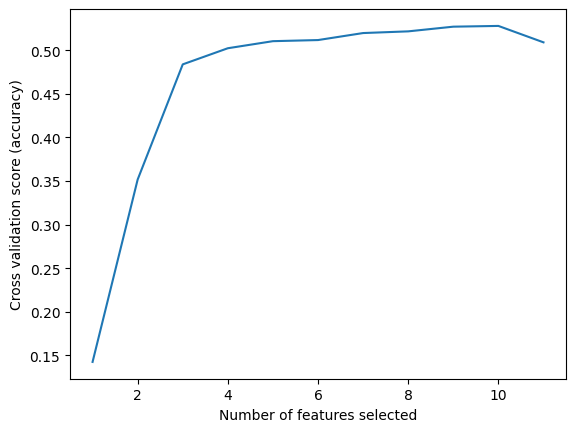

In [449]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
model=RandomForestClassifier(random_state=42)
rfecv=RFECV(estimator=model,step=1,cv=cv,scoring=scorer,min_features_to_select=1)
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Print the selected features
selected_features = X_train.columns[rfecv.support_]
print("Selected features:")
print(selected_features)


# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.axhline(rfecv.cv_results_['mean_test_score'].max(),linestyle='--')
plt.show()

In [461]:
print('Feature_not_needed-',(X_train.columns[rfecv.support_==False]).values)

Feature_not_needed- ['free_sulfur_dioxide']


___**Using selectKBest**___

All features are important


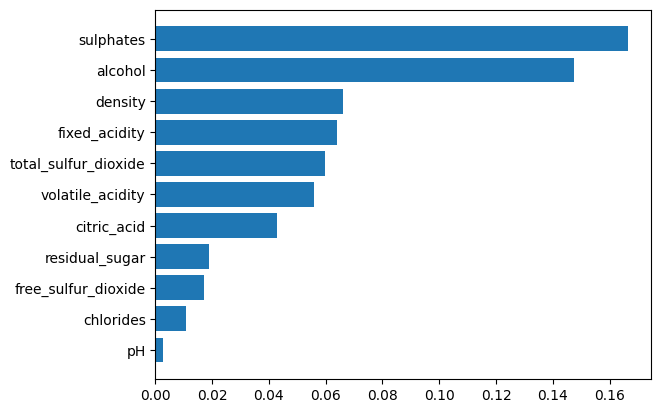

In [481]:

from sklearn.feature_selection import SelectKBest,mutual_info_classif

fs=SelectKBest(score_func=mutual_info_classif,k='all')
fs.fit(X_train,y_train)
X_train_fs=fs.transform(X_train)
X_test_fs=fs.transform(X_test)
if if fs.scores_.any()==0::
    print('All features contribute towards creating some variance in the target variable')
else:
    print('A few features are not important')
fs_df=pd.DataFrame({'Columns':X_train.columns,'Imp':fs.scores_})
fs_df=fs_df.sort_values(by='Imp',ascending=False)
plt.barh(fs_df['Columns'],fs_df['Imp'])
plt.gca().invert_yaxis()
plt.show()


### <U>Correlation Analysis:<U>
- `fixed_acidity` is significantly correlated with `citric_acid` and `density`, and negatively correlated with `pH`. This behavior may cause multicollinearity, leading the model to overemphasize this feature and impair learning.
- `alcohol` and `sulphates` contribute positively to model performance. Their absence negatively impacts the model more significantly.
- `total_sulfur_dioxide` has a strong correlation (0.65) with `free_sulfur_dioxide`.
- `volatile_acidity` has a slightly negative correlation (-0.5) with `citric_acid`.

Upon reviewing feature removal, it is evident that removing features correlated with the above listed features did not show any significant positive or negative impact. However, individually removing `fixed_acidity`, `volatile_acidity`, and `total_sulfur_dioxide` led to improvements in performance metrics of the RandomForest model.


*Feature importance for RF model*

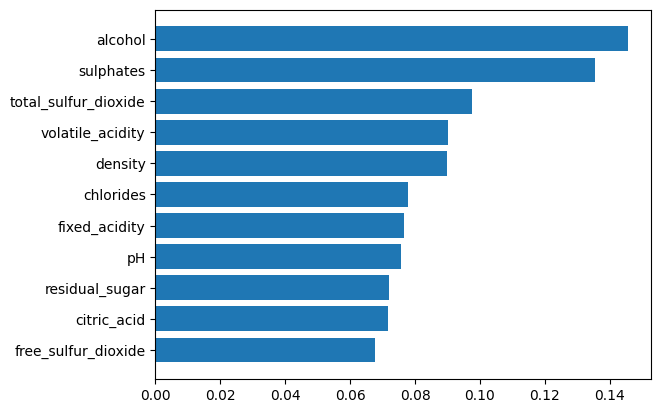

In [566]:

model=RandomForestClassifier(random_state=42)
for i in iter:
    model.fit(X_train,y_train)
    imp_df=pd.DataFrame({'Columns':X_train.columns,'Imp':model.feature_importances_})
    imp_df=imp_df.sort_values(by='Imp',ascending=False)
    plt.barh(imp_df['Columns'],imp_df['Imp'])
    plt.gca().invert_yaxis()
    plt.show()

___**Removing the negatively impacted features in different possibile combinations to observe any model performance improvement in Random Forest Classifiers**___

In [575]:

iter=[[],['fixed_acidity', 'volatile_acidity','total_sulfur_dioxide'],['fixed_acidity', 'volatile_acidity'],
['fixed_acidity','total_sulfur_dioxide'],['volatile_acidity','total_sulfur_dioxide'],['fixed_acidity'],['volatile_acidity'],['total_sulfur_dioxide']]

accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
rem_f=[]
for i in iter:
    model=RandomForestClassifier(random_state=42)
    model.fit(X_train.drop(i,axis=1),y_train)
    acc=accuracy_score(y_test,model.predict(X_test.drop(i,axis=1)))
    cks=cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic')
    log=log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1)))
    #print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
    #print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
    #print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))
    rem_f.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)

test=pd.DataFrame({'Removed_features':rem_f,'Acc_':accuracy_scores,'Cks_':cohen_kappa_scores,'Logloss_':logloss_scores})
test.style.background_gradient()


,Removed_features,Acc_,Cks_,Logloss_
0,[],0.592187,0.550066,1.117236
1,"['fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide']",0.592187,0.551776,1.138146
2,"['fixed_acidity', 'volatile_acidity']",0.575000,0.513599,1.224773
3,"['fixed_acidity', 'total_sulfur_dioxide']",0.559375,0.527579,1.387755
4,"['volatile_acidity', 'total_sulfur_dioxide']",0.587500,0.553735,1.189564
5,['fixed_acidity'],0.598437,0.552573,1.311098
6,['volatile_acidity'],0.589063,0.552059,1.067298
7,['total_sulfur_dioxide'],0.579688,0.553769,1.225397


___**Converting the specific features into a single Principal Component Axis**___

In [579]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pca=PCA(svd_solver='arpack')
X_train_pca=pca.fit_transform(X_train)
cumulative_explained_variance=np.cumsum(pca.explained_variance_ratio_)
n_components=np.argmax(cumulative_explained_variance>=0.95)+1
pca=PCA(n_components=n_components,svd_solver='arpack')
preprocessing=Pipeline(steps=[('pca',pca)])
X_train_pca=preprocessing.fit_transform(X_train)
X_test_pca=preprocessing.transform(X_test)
model=RandomForestClassifier(random_state=42)
model.fit(X_train.drop(i,axis=1),y_train)
print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test.drop(i,axis=1))))
print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test.drop(i,axis=1)),weights='quadratic'))
print('Logloss-',log_loss(y_test,model.predict_proba(X_test.drop(i,axis=1))))

Accuracy_score- 0.5796875
Cohen_kappa_score- 0.5537686260265451
Logloss- 1.2253973905852011


___**Converting the features into a single Principal Component Axis in different iterations**___

In [604]:
iter=[['fixed_acidity', 'volatile_acidity','total_sulfur_dioxide'],['fixed_acidity', 'volatile_acidity'],
['fixed_acidity','total_sulfur_dioxide'],['volatile_acidity','total_sulfur_dioxide']]

accuracy_scores=[]
cohen_kappa_scores=[]
logloss_scores=[]
pca_f=[]

for i in iter:
    
    pca=PCA(n_components=1,svd_solver='arpack')
    X_train_pca=pca.fit_transform(X_train[i])
    X_test_pca=pca.transform(X_test[i])
    X_train_pca=pd.DataFrame(X_train_pca,columns=['Pca_0'])
    X_test_pca=pd.DataFrame(X_test_pca,columns=['Pca_0'])
    X_train_temp=X_train.copy()
    X_train_temp=X_train_temp.drop(i,axis=1)
    X_test_temp=X_test.copy()
    X_test_temp=X_test_temp.drop(i,axis=1)
    X_train_pca=pd.concat([X_train_temp,X_train_pca],axis=1)
    X_test_pca=pd.concat([X_test_temp,X_test_pca],axis=1)
            
    model=RandomForestClassifier(random_state=42)
            
    model.fit(X_train_pca,y_train)
    acc=accuracy_score(y_test,model.predict(X_test_pca))
    cks=cohen_kappa_score(y_test,model.predict(X_test_pca),weights='quadratic')
    log=log_loss(y_test,model.predict_proba(X_test_pca))
            
    pca_f.append(i)
    accuracy_scores.append(acc)
    cohen_kappa_scores.append(cks)
    logloss_scores.append(log)
        
        

test=pd.DataFrame({'pca_features':pca_f,'Acc_':accuracy_scores,'Cks_':cohen_kappa_scores,'Logloss_':logloss_scores})
test.style.background_gradient()


,pca_features,Acc_,Cks_,Logloss_
0,"['fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide']",0.575000,0.554093,1.287990
1,"['fixed_acidity', 'volatile_acidity']",0.585938,0.545385,1.239713
2,"['fixed_acidity', 'total_sulfur_dioxide']",0.592187,0.552246,1.329348
3,"['volatile_acidity', 'total_sulfur_dioxide']",0.581250,0.533597,1.130816


- Despite having a high class imbalance the cohen kappa score and accuracy scores are reasobnably close for the scenario when pca is applied on
 all three features. The closeness of the scores indicate that the model is making predictions that reasonably align well with actual labels

- only a small improvement through feature selection was achieved at 0.554093 using rf model

### <u>Hyperparameter Optimization of LGB Model using Bayesian Optimization<u>

In [80]:
# Alternative SCORE METRIC FOR HYPEROPT
# USE NEGATIVE SCORE FOR OPTIMIZATION
from sklearn.metrics import make_scorer

def cohen_logloss_metric(y_true, y_pred_prob):
    y_pred = np.argmax(y_pred_prob, axis=1)
    logloss = log_loss(y_true, y_pred_prob)
    cohen = cohen_kappa_score(y_true, y_pred,weights='quadratic')
    score = cohen - logloss
    return score

def kappa_score(y_true,y_pred):
    score=cohen_kappa_score(y_true,y_pred,weights='quadratic')
    return score

scorer=make_scorer(kappa_score)

In [47]:


from hyperopt import Trials,hp,tpe,STATUS_OK,fmin
import lightgbm as lgb
import time

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score,log_loss

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

cohen_score_final_1 = []
logloss_final_1 = []

space = {
    'n_estimators': hp.quniform('n_estimators', 200, 1000, 40),
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    #'min_child_weight': hp.quniform('min_child_weight', 0, 20, 1),
    'min_child_samples': hp.uniform('min_child_samples', 0, 50),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.0, 1),
    'subsample': hp.uniform('subsample', 0.0, 1),
    'lambda_l1': hp.uniform('reg_lambda', 0, 1),
    'lambda_l2': hp.uniform('reg_alpha', 0, 1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 10, 50, 1)
}

start_time=time.time()

def objective_fn(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
   # params['min_child_weight'] = int(params['min_child_weight'])
    params['min_data_in_leaf'] = int(params['min_data_in_leaf'])

    model=lgb.LGBMClassifier(random_state=42,objective='multiclass',num_class=6,verbosity=-1,**params)
    model.fit(X_train,y_train)
    y_pred_prob=model.predict_proba(X_test)
    score=cohen_kappa_score(y_test,np.argmax(y_pred_prob,axis=1),weights='quadratic')
    cohen_score_final_1.append(score)
    logloss_final_1.append(log_loss(y_test,y_pred_prob))


    return {'loss': -score
            , 'status': STATUS_OK}

trials=Trials()
best_1=fmin(fn=objective_fn,trials=trials,algo=tpe.suggest,max_evals=150,space=space,rstate=np.random.default_rng(42))
print('The best hyperparameters found for the dataset based on cohen_kappa_score_metric is:', best_1)

end_time=time.time()
print(f"Iteration completed in {end_time - start_time:.2f} seconds")

100%|█████████████████████████████████████████████| 150/150 [04:42<00:00,  1.88s/trial, best loss: -0.5573591434197833]
The best hyperparameters found for the dataset based on cohen_kappa_score_metric is: {'colsample_bytree': 0.47921000279063247, 'learning_rate': 0.12153311165519165, 'max_depth': 15.0, 'min_child_samples': 9.405396329691694, 'min_data_in_leaf': 37.0, 'n_estimators': 520.0, 'reg_alpha': 0.12441636287610586, 'reg_lambda': 0.3466583113455475, 'subsample': 0.5634555222360904}
Iteration completed in 282.25 seconds


### <u>Hyperparameter Optimization of LGB Model using Optuna<u>

In [20]:


import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cohen_kappa_obj=[]
logloss_obj=[]

def objective_fn(trial):


    params={
        'n_estimators':trial.suggest_int('n_estimators', 200, 1000,step=40),
        'max_depth':trial.suggest_int('max_depth',3,18,step=1),
        #'min_child_weight':trial.suggest_int('min_child_weight',0,20,step=1),
        'min_child_samples':trial.suggest_float('min_child_samples', 0, 50),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.0,1),
        'subsample': trial.suggest_float('subsample', 0.0, 1),
        'lambda_l1': trial.suggest_float('reg_lambda', 0, 1),
        'lambda_l2': trial.suggest_float('reg_alpha', 0, 1),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.2),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 10, 50, step=1),
        'num_class':6,
        'objective':'multiclass',
        'verbosity':-1
    }

    model=lgb.LGBMClassifier(random_state=42,**params)
    model.fit(X_train,y_train)
    y_pred_prob=model.predict(X_test)
    score=cohen_kappa_score(y_test,y_pred_prob,weights='quadratic')  
    cohen_kappa_obj.append(score)
    logloss_obj.append(log_loss(y_test,model.predict_proba(X_test)))

    return score

study_0=optuna.create_study(direction='maximize')
study_0.optimize(objective_fn,n_trials=150)
print('The best hyperparameters found for the dataset based on cks is:', study_0.best_params) 
    
    

[I 2024-07-11 11:33:54,009] A new study created in memory with name: no-name-ef911cae-ed09-419f-8f2c-968050caecd3
[I 2024-07-11 11:33:54,721] Trial 0 finished with value: 0.5119079137145499 and parameters: {'n_estimators': 600, 'max_depth': 4, 'min_child_samples': 31.164132474385433, 'colsample_bytree': 0.9297659543852991, 'subsample': 0.8208320479701616, 'reg_lambda': 0.9592215733181875, 'reg_alpha': 0.9083878093396244, 'learning_rate': 0.1754866751210349, 'min_data_in_leaf': 47}. Best is trial 0 with value: 0.5119079137145499.
[I 2024-07-11 11:33:55,115] Trial 1 finished with value: 0.50698729655583 and parameters: {'n_estimators': 280, 'max_depth': 3, 'min_child_samples': 24.63838655058888, 'colsample_bytree': 0.5452978099834459, 'subsample': 0.7717096733371308, 'reg_lambda': 0.5161550748458301, 'reg_alpha': 0.6778246949286114, 'learning_rate': 0.09042826752777681, 'min_data_in_leaf': 21}. Best is trial 0 with value: 0.5119079137145499.
[I 2024-07-11 11:33:56,086] Trial 2 finished w

The best hyperparameters found for the dataset based on cks is: {'n_estimators': 600, 'max_depth': 12, 'min_child_samples': 21.262024963527367, 'colsample_bytree': 0.8335340083575986, 'subsample': 0.944757166956307, 'reg_lambda': 0.8148026903158695, 'reg_alpha': 0.6986329003534865, 'learning_rate': 0.012887540978258586, 'min_data_in_leaf': 14}


### <u>Hyperparameter Optimization of LGB Model using Optuna and cross validation<u>

In [21]:

import optuna
import lightgbm as lgb

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cohen_kappa_obj=[]
logloss_obj=[]

def objective_fn(trial):


    params={
        'n_estimators':trial.suggest_int('n_estimators', 200, 1000,step=40),
        'max_depth':trial.suggest_int('max_depth',3,18,step=1),
        #'min_child_weight':trial.suggest_int('min_child_weight',0,20,step=1),
        'min_child_samples':trial.suggest_float('min_child_samples', 0, 50),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.0,1),
        'subsample': trial.suggest_float('subsample', 0.0, 1),
        'lambda_l1': trial.suggest_float('reg_lambda', 0, 1),
        'lambda_l2': trial.suggest_float('reg_alpha', 0, 1),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.2),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 10, 50, step=1),
        'num_class':6,
        'objective':'multiclass',
        'early_stopping_rounds':50,
        'verbosity':-1
    }
    cohen_kappa=[]
    logloss=[]

    for i,(train_idx,valid_idx) in enumerate(cv.split(X_train,y_train)):

        params_1=params.copy()
        del params_1['n_estimators']
        
        training_dataset=lgb.Dataset(X_train.iloc[train_idx],label=y_train.iloc[train_idx])
        validation_dataset=lgb.Dataset(X_train.iloc[valid_idx],label=y_train.iloc[valid_idx])

        clf=lgb.train(params_1,training_dataset,params['n_estimators'],valid_sets=[training_dataset,validation_dataset])

        y_predict_prob=clf.predict(X_train.iloc[valid_idx],num_iteration=clf.best_iteration)
        y_predict_normalized=y_predict_prob/np.sum(y_predict_prob,axis=1,keepdims=True)
        y_predict=np.argmax(y_predict_normalized,axis=1)
        cohen_kappa.append(cohen_kappa_score(y_train.iloc[valid_idx],y_predict,weights='quadratic'))
        labels=np.unique(y_train)
        logloss.append(log_loss(y_train.iloc[valid_idx],y_predict_normalized,labels=labels))
        
    score=np.mean(cohen_kappa)   
    cohen_kappa_obj.append(score)
    logloss_obj.append(np.mean(logloss))

    return score

study_1=optuna.create_study(direction='maximize')
study_1.optimize(objective_fn,n_trials=100)
print('The best hyperparameters found for the dataset based on cks is:', study_1.best_params) 
    
    

[I 2024-07-11 11:37:23,402] A new study created in memory with name: no-name-6e88129d-26ac-4aed-a41e-a5f8428e46ab
[I 2024-07-11 11:37:25,776] Trial 0 finished with value: 0.4790665181216536 and parameters: {'n_estimators': 920, 'max_depth': 12, 'min_child_samples': 38.82793421839333, 'colsample_bytree': 0.18051884223456738, 'subsample': 0.7274634046787686, 'reg_lambda': 0.21492645310847458, 'reg_alpha': 0.25658365656479776, 'learning_rate': 0.0442886473084579, 'min_data_in_leaf': 49}. Best is trial 0 with value: 0.4790665181216536.
[I 2024-07-11 11:37:27,173] Trial 1 finished with value: 0.49233077395215286 and parameters: {'n_estimators': 720, 'max_depth': 8, 'min_child_samples': 17.81897809654432, 'colsample_bytree': 0.36039785981856753, 'subsample': 0.9735369982946513, 'reg_lambda': 0.7868859224986977, 'reg_alpha': 0.3348975533706178, 'learning_rate': 0.16993701506950154, 'min_data_in_leaf': 37}. Best is trial 1 with value: 0.49233077395215286.
[I 2024-07-11 11:37:28,751] Trial 2 fi

The best hyperparameters found for the dataset based on cks is: {'n_estimators': 840, 'max_depth': 17, 'min_child_samples': 38.84360999199063, 'colsample_bytree': 0.8487302839163936, 'subsample': 0.665001117868308, 'reg_lambda': 0.1819825494403951, 'reg_alpha': 0.5345514200279409, 'learning_rate': 0.10631857285346068, 'min_data_in_leaf': 24}


In [65]:
params_hypertuned=[('Bayesian_Hyperopt',best_1),('Optuna_general',study_0.best_params),('Optuna_using_cross_validation',study_1.best_params)]

### <u>LGB Model Eval using tuned Hyperparameters<u>

In [69]:
for params in params_hypertuned:
    if params[0]=='Bayesian_Hyperopt':
        params[1]['n_estimators']=int(params[1]['n_estimators'])
        params[1]['max_depth']=int(params[1]['max_depth'])
        params[1]['min_data_in_leaf']=int(params[1]['min_data_in_leaf'])
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test)))
        print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test),weights='quadratic'))
        print('Logloss-',log_loss(y_test,model.predict_proba(X_test)))
        print(classification_report(y_test,model.predict(X_test),zero_division=0))
    else:
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test)))
        print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test),weights='quadratic'))
        print('Logloss-',log_loss(y_test,model.predict_proba(X_test)))
        print(classification_report(y_test,model.predict(X_test),zero_division=0))     


 Bayesian_Hyperopt
----------------------------------------------
Accuracy_score- 0.5828125
Cohen_kappa_score- 0.5343137254901962
Logloss- 1.5071220969127896
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        18
           2       0.66      0.67      0.67       274
           3       0.51      0.62      0.56       230
           4       0.57      0.44      0.50       104
           5       0.50      0.11      0.18         9

    accuracy                           0.58       640
   macro avg       0.37      0.31      0.32       640
weighted avg       0.57      0.58      0.57       640


 Optuna_general
----------------------------------------------
Accuracy_score- 0.58125
Cohen_kappa_score- 0.5618140832889569
Logloss- 1.0301664433955104
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.06  

#### <U>Model Eval using cross validation for a generalized evaluation<U>

In [82]:

from sklearn.model_selection import cross_val_score
for params in params_hypertuned:
    if params[0]=='Bayesian_Hyperopt':
        params[1]['n_estimators']=int(params[1]['n_estimators'])
        params[1]['max_depth']=int(params[1]['max_depth'])
        params[1]['min_data_in_leaf']=int(params[1]['min_data_in_leaf'])
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')))
        print('Cohen_kappa_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring=scorer)))
        print('Logloss-',-1*np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_log_loss')))
    else:
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')))
        print('Cohen_kappa_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring=scorer)))
        print('Logloss-',-1*np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_log_loss')))


 Bayesian_Hyperopt
----------------------------------------------
Accuracy_score- 0.5857773376369327
Cohen_kappa_score- 0.48899694066127813
Logloss- 1.5036605925547573

 Optuna_general
----------------------------------------------
Accuracy_score- 0.606492688771518
Cohen_kappa_score- 0.5091083514037908
Logloss- 1.0377775592079475

 Optuna_using_cross_validation
----------------------------------------------
Accuracy_score- 0.5834372554773083
Cohen_kappa_score- 0.47908962971582325
Logloss- 1.2552532493867927


### <U>Hyperparameter Optimization on Oversampled dataset for lgb<U>

In [57]:


from hyperopt import Trials,hp,tpe,STATUS_OK,fmin
import lightgbm as lgb
import time

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score,log_loss

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

cohen_score_final_1 = []
logloss_final_1 = []

space = {
    'n_estimators': hp.quniform('n_estimators', 200, 1000, 40),
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    #'min_child_weight': hp.quniform('min_child_weight', 0, 20, 1),
    'min_child_samples': hp.uniform('min_child_samples', 0, 50),
    'colsample_bytree': hp.uniform('colsa  mple_bytree', 0.0, 1),
    'subsample': hp.uniform('subsample', 0.0, 1),
    'lambda_l1': hp.uniform('reg_lambda', 0, 1),
    'lambda_l2': hp.uniform('reg_alpha', 0, 1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 10, 50, 1)
}

start_time=time.time()

def objective_fn(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
   # params['min_child_weight'] = int(params['min_child_weight'])
    params['min_data_in_leaf'] = int(params['min_data_in_leaf'])

    model=lgb.LGBMClassifier(random_state=42,objective='multiclass',num_class=6,verbosity=-1,**params)
    model.fit(X_train,y_train)
    y_pred_prob=model.predict_proba(X_test)
    score=cohen_metric(y_test,y_pred_prob)
    cohen_score_final_1.append(score)
    logloss_final_1.append(log_loss(y_test,y_pred_prob))


    return {'loss': -score, 'status': STATUS_OK}

trials=Trials()
best_1=fmin(fn=objective_fn,trials=trials,algo=tpe.suggest,max_evals=150,space=space,rstate=np.random.default_rng(42))
print('The best hyperparameters found for the dataset based on cohen_kappa_score_metric is:', best_1)

end_time=time.time()
print(f"Iteration completed in {end_time - start_time:.2f} seconds")

100%|█████████████████████████████████████████████| 150/150 [11:48<00:00,  4.72s/trial, best loss: -0.5569060348474941]
The best hyperparameters found for the dataset based on cohen_kappa_score_metric is: {'colsample_bytree': 0.7018539972766721, 'learning_rate': 0.06697477332968262, 'max_depth': 14.0, 'min_child_samples': 26.46291749708589, 'min_data_in_leaf': 50.0, 'n_estimators': 960.0, 'reg_alpha': 0.4614410581651772, 'reg_lambda': 0.008387293579121657, 'subsample': 0.9499288531495151}
Iteration completed in 708.31 seconds


### <U>Optuna Optimization on Oversampled dataset for lgb<U>

In [23]:

import optuna
import lightgbm as lgb

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cohen_kappa_obj=[]
logloss_obj=[]

def objective_fn(trial):


    params={
        'n_estimators':trial.suggest_int('n_estimators', 200, 1000,step=40),
        'max_depth':trial.suggest_int('max_depth',3,18,step=1),
        #'min_child_weight':trial.suggest_int('min_child_weight',0,20,step=1),
        'min_child_samples':trial.suggest_float('min_child_samples', 0, 50),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.0,1),
        'subsample': trial.suggest_float('subsample', 0.0, 1),
        'lambda_l1': trial.suggest_float('reg_lambda', 0, 1),
        'lambda_l2': trial.suggest_float('reg_alpha', 0, 1),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.2),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 10, 50, step=1),
        'num_class':6,
        'objective':'multiclass',
        'early_stopping_rounds':50,
        'verbosity':-1
    }
    cohen_kappa=[]
    logloss=[]

    for i,(train_idx,valid_idx) in enumerate(cv.split(X_train,y_train)):

        params_1=params.copy()
        del params_1['n_estimators']
        
        training_dataset=lgb.Dataset(X_train.iloc[train_idx],label=y_train.iloc[train_idx])
        validation_dataset=lgb.Dataset(X_train.iloc[valid_idx],label=y_train.iloc[valid_idx])

        clf=lgb.train(params_1,training_dataset,params['n_estimators'],valid_sets=[training_dataset,validation_dataset])

        y_predict_prob=clf.predict(X_train.iloc[valid_idx],num_iteration=clf.best_iteration)
        y_predict_normalized=y_predict_prob/np.sum(y_predict_prob,axis=1,keepdims=True)
        y_predict=np.argmax(y_predict_normalized,axis=1)
        cohen_kappa.append(cohen_kappa_score(y_train.iloc[valid_idx],y_predict,weights='quadratic'))
        labels=np.unique(y_train)
        logloss.append(log_loss(y_train.iloc[valid_idx],y_predict_normalized,labels=labels))
        
    score=np.mean(cohen_kappa)   
    cohen_kappa_obj.append(score)
    logloss_obj.append(np.mean(logloss))

    return score

study_2=optuna.create_study(direction='maximize')
study_2.optimize(objective_fn,n_trials=100)
print('The best hyperparameters found for the dataset based on cks is:', study_2.best_params) 
    
    

[I 2024-07-11 11:40:22,743] A new study created in memory with name: no-name-e2791e84-bbd0-4c34-97c8-b97b67d92e82
[I 2024-07-11 11:40:37,301] Trial 0 finished with value: 0.9540068085418785 and parameters: {'n_estimators': 1000, 'max_depth': 9, 'min_child_samples': 45.72959204506968, 'colsample_bytree': 0.29674890149344624, 'subsample': 0.608098701708718, 'reg_lambda': 0.5144362451190984, 'reg_alpha': 0.2586446231649714, 'learning_rate': 0.06905429137305026, 'min_data_in_leaf': 46}. Best is trial 0 with value: 0.9540068085418785.
[I 2024-07-11 11:40:41,155] Trial 1 finished with value: 0.9429582581230898 and parameters: {'n_estimators': 280, 'max_depth': 3, 'min_child_samples': 28.815436907831725, 'colsample_bytree': 0.2690436891784519, 'subsample': 0.6025408561044961, 'reg_lambda': 0.36408426235868663, 'reg_alpha': 0.6720042060891247, 'learning_rate': 0.18671471556242797, 'min_data_in_leaf': 29}. Best is trial 0 with value: 0.9540068085418785.
[I 2024-07-11 11:40:55,754] Trial 2 finis

The best hyperparameters found for the dataset based on cks is: {'n_estimators': 680, 'max_depth': 18, 'min_child_samples': 33.24240602540592, 'colsample_bytree': 0.4686860189249278, 'subsample': 0.7601651886738744, 'reg_lambda': 0.19466229463158413, 'reg_alpha': 0.026368839050235973, 'learning_rate': 0.0296126405851663, 'min_data_in_leaf': 46}


In [ ]:
####################################

In [84]:
best_2={'colsample_bytree': 0.7018539972766721, 'learning_rate': 0.06697477332968262, 'max_depth': 14.0, 'min_child_samples': 26.46291749708589, 'min_data_in_leaf': 50.0, 'n_estimators': 960.0, 'reg_alpha': 0.4614410581651772, 'reg_lambda': 0.008387293579121657, 'subsample': 0.9499288531495151}

In [88]:
params_hypertuned=[('Bayesian_Hyperopt',best_2),('Optuna_using_cross_validation',study_2.best_params)]

### <U>LGB Model Eval on Oversampled dataset using tuned hyperparameters<U>

In [89]:

for params in params_hypertuned:
    if params[0]=='Bayesian_Hyperopt':
        params[1]['n_estimators']=int(params[1]['n_estimators'])
        params[1]['max_depth']=int(params[1]['max_depth'])
        params[1]['min_data_in_leaf']=int(params[1]['min_data_in_leaf'])
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test)))
        print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test),weights='quadratic'))
        print('Logloss-',log_loss(y_test,model.predict_proba(X_test)))
        print(classification_report(y_test,model.predict(X_test)))
    else:
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test)))
        print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test),weights='quadratic'))
        print('Logloss-',log_loss(y_test,model.predict_proba(X_test)))
        print(classification_report(y_test,model.predict(X_test)))     


 Bayesian_Hyperopt
----------------------------------------------
Accuracy_score- 0.578125
Cohen_kappa_score- 0.555719485291559
Logloss- 1.3185955252201969
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.18      0.11      0.14        18
           2       0.68      0.66      0.67       274
           3       0.52      0.58      0.55       230
           4       0.55      0.49      0.52       104
           5       0.23      0.33      0.27         9

    accuracy                           0.58       640
   macro avg       0.36      0.36      0.36       640
weighted avg       0.58      0.58      0.58       640


 Optuna_using_cross_validation
----------------------------------------------
Accuracy_score- 0.5734375
Cohen_kappa_score- 0.5444880896608887
Logloss- 1.1724482111472514
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0

#### <U>Model Eval using tuned hyperparameters through cross validation for a generalized evaluation on oversampled data set<U>

In [92]:

for params in params_hypertuned:
    if params[0]=='Bayesian_Hyperopt':
        params[1]['n_estimators']=int(params[1]['n_estimators'])
        params[1]['max_depth']=int(params[1]['max_depth'])
        params[1]['min_data_in_leaf']=int(params[1]['min_data_in_leaf'])
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')))
        print('Cohen_kappa_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring=scorer)))
        print('Logloss-',np.mean(-1*cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_log_loss')))
    else:
        model=lgb.LGBMClassifier(random_state=42,num_class=6,verbosity=-1,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')))
        print('Cohen_kappa_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring=scorer)))
        print('Logloss-',np.mean(-1*cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_log_loss')))


 Bayesian_Hyperopt
----------------------------------------------
Accuracy_score- 0.8411259541984734
Cohen_kappa_score- 0.9527184527143243
Logloss- 0.4624613733763274

 Optuna_using_cross_validation
----------------------------------------------
Accuracy_score- 0.8438295165394403
Cohen_kappa_score- 0.9573211379195053
Logloss- 0.41765137744555414


In [95]:
booster_model_train_params=[('Bayesian_Hyperopt_reg',best_1),('Optuna_general_reg',study_0.best_params),('Optuna_using_cross_validation_reg',study_1.best_params),
                            ('Bayesian_Hyperopt_os',best_2),('Optuna_using_cross_validation_os',study_2.best_params)]

### <u>Model Training using tuned hyperparameters through cross validation using LGB models for a generalized evaluation on `regular` sampled data set<u> 

Avg Train Score 0.5664446877294749
Avg valid Score 0.9941538468871058
accuracy_score- valid_oof 0.6096131301289566
cohen_kappa_score- valid_oof 0.5069046086091724
logloss- valid_oof 0.9941497817734941
accuracy_score- predictions 0.575
cohen_kappa_score- predictions 0.533873434641601
logloss- predictions 0.9970517156503721


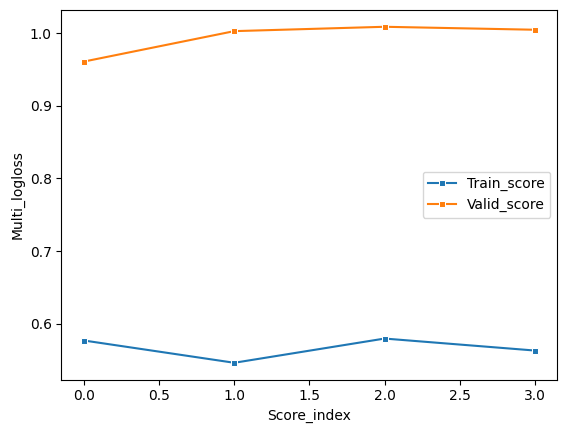

Avg Train Score 0.548300722195437
Avg valid Score 0.9828124435550137
accuracy_score- valid_oof 0.6068776865963267
cohen_kappa_score- valid_oof 0.5035227310353056
logloss- valid_oof 0.9828106739394753
accuracy_score- predictions 0.56875
cohen_kappa_score- predictions 0.520532666658249
logloss- predictions 0.9904602108107688


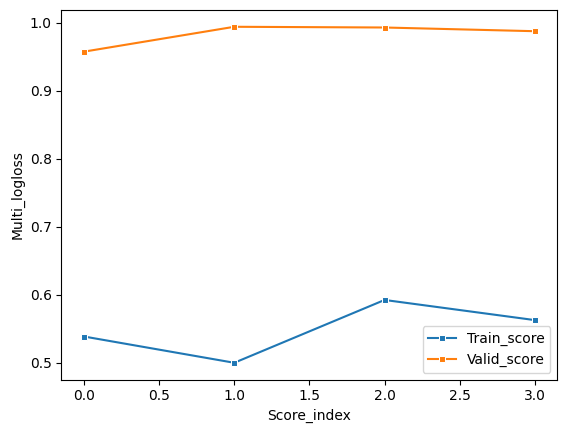

Avg Train Score 0.5702684632057626
Avg valid Score 0.9948928216371906
accuracy_score- valid_oof 0.6037514654161782
cohen_kappa_score- valid_oof 0.4928673725314785
logloss- valid_oof 0.9948909246928158
accuracy_score- predictions 0.5671875
cohen_kappa_score- predictions 0.5109421555532724
logloss- predictions 0.9944939713002003


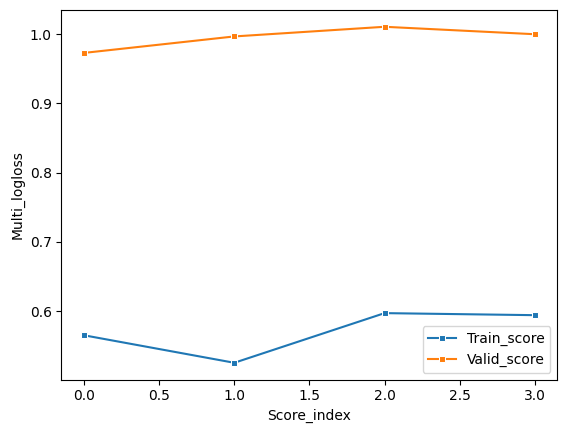

Avg Train Score 0.6555131495615891
Avg valid Score 0.9846288298738074
accuracy_score- valid_oof 0.6060961313012896
cohen_kappa_score- valid_oof 0.5056246448494603
logloss- valid_oof 0.9846254480954041
accuracy_score- predictions 0.5734375
cohen_kappa_score- predictions 0.5207141766093584
logloss- predictions 0.9969024710848793


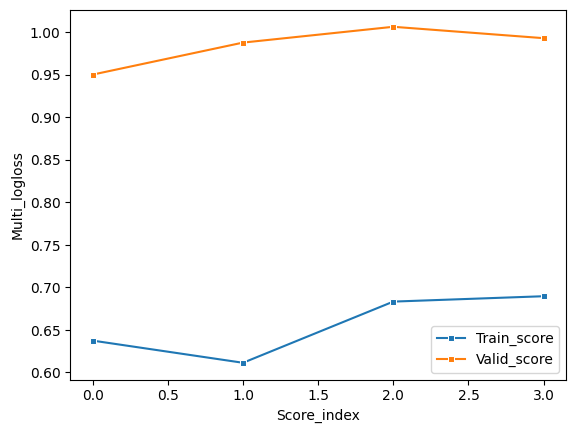

Avg Train Score 0.5720863972568436
Avg valid Score 0.9862311441208502
accuracy_score- valid_oof 0.608440797186401
cohen_kappa_score- valid_oof 0.49342465511269107
logloss- valid_oof 0.9862258453236932
accuracy_score- predictions 0.5796875
cohen_kappa_score- predictions 0.5299961461054254
logloss- predictions 0.9975988285430493


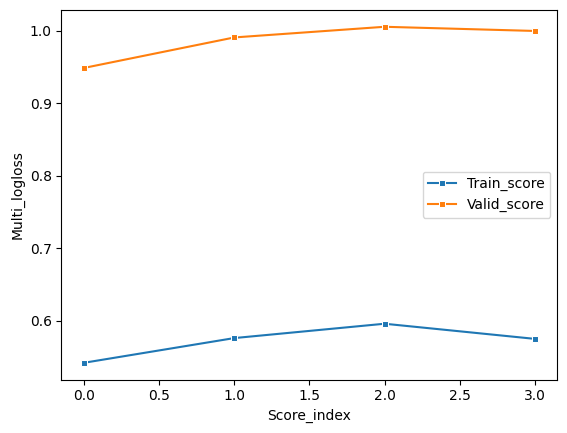

In [113]:
import lightgbm as lgb

for params in booster_model_train_params:

    predictions_prob=np.zeros((len(X_test),6))
    valid_oof_prob=np.zeros((len(X_train),6))
    
    cohen_kappa_scores_lgb=[]
    logloss_scores_lgb=[]
    train_score_lgb=[]
    valid_score_lgb=[]
    #feature_importance_lgb=pd.DataFrame()
    
    for i,(train_idx,valid_idx) in enumerate(cv.split(X_train,y_train)):
    
        
            params_1=params[1].copy()
            params_1['verbosity']=-1
            params_1['early_stopping_rounds']=50
            params_1['objective']='multiclass'
            params_1['num_class']=6
            del params_1['n_estimators']
        
        
            
            training_dataset=lgb.Dataset(X_train.iloc[train_idx],label=y_train.iloc[train_idx])
            validation_dataset=lgb.Dataset(X_train.iloc[valid_idx],label=y_train.iloc[valid_idx])
    
            clf=lgb.train(params_1,training_dataset,params[1]['n_estimators'],valid_sets=[training_dataset,
                                                                                         validation_dataset])
    
            train_score_lgb.append(clf.best_score['training']['multi_logloss'])
            valid_score_lgb.append(clf.best_score['valid_1']['multi_logloss'])
            valid_oof_prob[valid_idx]=clf.predict(X_train.iloc[valid_idx],num_iteration=clf.best_iteration)
            predictions_prob=predictions_prob+clf.predict(X_test,num_iteration=clf.best_iteration)
    
            # feature importance
            #fold_imp=pd.DataFrame()
            #fold_imp['Features']=X_train.columns
            #fold_imp['Importance'] = clf.feature_importance()
            #fold_imp['Fold']=fold
            #feature_importance_lgb=pd.concat([feature_importance_lgb,fold_imp],axis=0)
    
    predictions_prob=predictions_prob/cv.n_splits
    predictions_prob=predictions_prob/np.sum(predictions_prob,axis=1,keepdims=True)
    predictions=np.argmax(predictions_prob,axis=1)
    valid_oof_prob=valid_oof_prob/np.sum(valid_oof_prob,axis=1,keepdims=True)
    valid_oof=np.argmax(valid_oof_prob,axis=1)
    print('Avg Train Score',np.mean(train_score_lgb))
    print('Avg valid Score',np.mean(valid_score_lgb))
    print('accuracy_score- valid_oof',accuracy_score(y_train,valid_oof))
    print('cohen_kappa_score- valid_oof',cohen_kappa_score(y_train,valid_oof,weights='quadratic'))
    print('logloss- valid_oof',log_loss(y_train,valid_oof_prob))
    print('accuracy_score- predictions',accuracy_score(y_test,predictions))
    print('cohen_kappa_score- predictions',cohen_kappa_score(y_test,predictions,weights='quadratic'))
    print('logloss- predictions',log_loss(y_test,predictions_prob))
    Score=pd.DataFrame({'Train_score':train_score_lgb,'Valid_score':valid_score_lgb})
    sns.lineplot(data=Score,x=Score.index,y='Train_score',label='Train_score',marker='s',ms=5)
    sns.lineplot(data=Score,x=Score.index,y='Valid_score',label='Valid_score',marker='s',ms=5)
    plt.xlabel('Score_index')
    plt.ylabel('Multi_logloss')
    plt.legend()
    plt.show()


### <u>Overall Model Performance<u>

- The model demonstrates stable performance across different folds with slight variations in accuracy and Kappa scores. The logloss values are consistent, indicating reliable prediction probabilities. 

- The highest average train score (0.655) doesn't necessarily translate to the best prediction metrics, suggesting that focusing solely on training performance might lead to overfitting. Balancing train and validation performance is crucial for better generalization.

**Conclusion**: The model trained using the LGB library exhibits stable performance across different folds. Further tuning, especially focusing on improving the Cohen's Kappa score, could help enhance the model's predictive agreement and overall effectiveness.


### <u>Model Eval using tuned hyperparameters through cross validation using LGB Library for a generalized evaluation on `Oversampled` sampled data set<u> 

Avg Train Score 0.057191568282746394
Avg valid Score 0.41950111848936644
accuracy_score- valid_oof 0.839058524173028
cohen_kappa_score- valid_oof 0.9531800683186032
logloss- valid_oof 0.4195011184893664
accuracy_score- predictions 0.578125
cohen_kappa_score- predictions 0.5261319197010516
logloss- predictions 1.0811670804232816


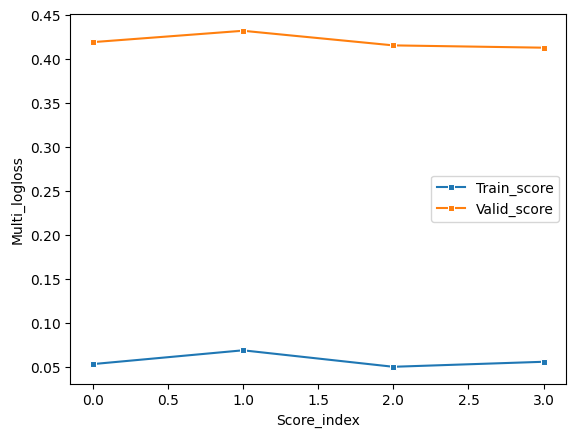

Avg Train Score 0.15570715882767586
Avg valid Score 0.4596483576274325
accuracy_score- valid_oof 0.834764631043257
cohen_kappa_score- valid_oof 0.9502100387763894
logloss- valid_oof 0.4596483576274324
accuracy_score- predictions 0.5421875
cohen_kappa_score- predictions 0.5113981646893562
logloss- predictions 1.0731027879349067


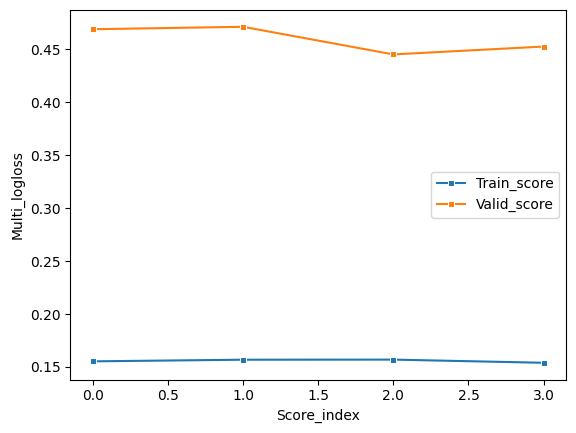

Avg Train Score 0.06384739725371387
Avg valid Score 0.4296217577567098
accuracy_score- valid_oof 0.8417620865139949
cohen_kappa_score- valid_oof 0.9521483320738422
logloss- valid_oof 0.4296217577567097
accuracy_score- predictions 0.5703125
cohen_kappa_score- predictions 0.548424701659662
logloss- predictions 1.1087171586447213


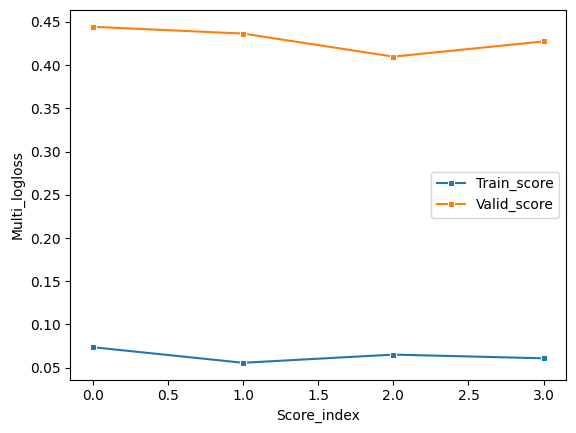

Avg Train Score 0.06498554595734152
Avg valid Score 0.4278164610164018
accuracy_score- valid_oof 0.8403307888040712
cohen_kappa_score- valid_oof 0.9547468525422813
logloss- valid_oof 0.4278164610164018
accuracy_score- predictions 0.5671875
cohen_kappa_score- predictions 0.526294524478065
logloss- predictions 1.1171019865226004


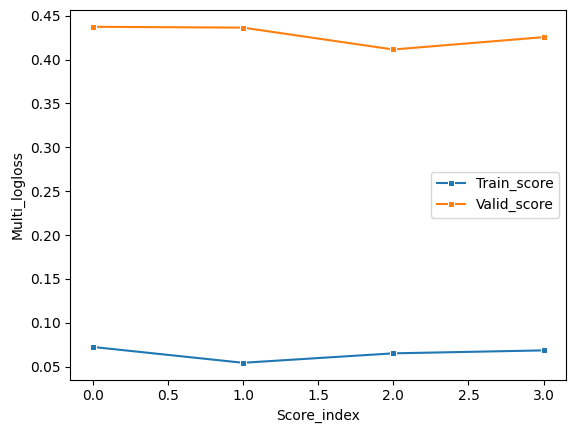

Avg Train Score 0.05778391692541446
Avg valid Score 0.412516831194572
accuracy_score- valid_oof 0.8417620865139949
cohen_kappa_score- valid_oof 0.9557433166702891
logloss- valid_oof 0.412516831194572
accuracy_score- predictions 0.5765625
cohen_kappa_score- predictions 0.5445627902663137
logloss- predictions 1.0910673784216907


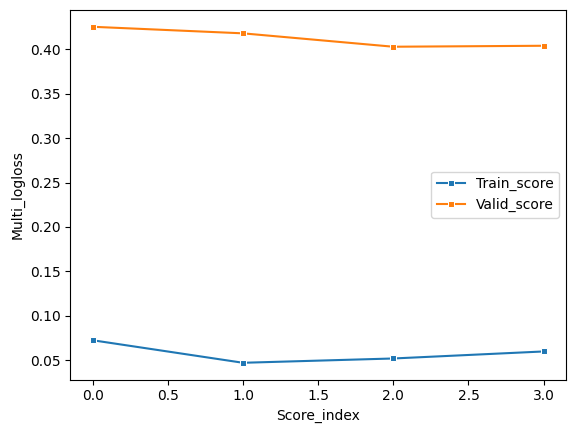

In [111]:
import lightgbm as lgb

for params in booster_model_train_params:

    predictions_prob=np.zeros((len(X_test),6))
    valid_oof_prob=np.zeros((len(X_train),6))
    
    cohen_kappa_scores_lgb=[]
    logloss_scores_lgb=[]
    train_score_lgb=[]
    valid_score_lgb=[]
    #feature_importance_lgb=pd.DataFrame()
    
    for i,(train_idx,valid_idx) in enumerate(cv.split(X_train,y_train)):
    
        
            params_1=params[1].copy()
            params_1['verbosity']=-1
            params_1['early_stopping_rounds']=50
            params_1['objective']='multiclass'
            params_1['num_class']=6
            del params_1['n_estimators']
        
        
            
            training_dataset=lgb.Dataset(X_train.iloc[train_idx],label=y_train.iloc[train_idx])
            validation_dataset=lgb.Dataset(X_train.iloc[valid_idx],label=y_train.iloc[valid_idx])
    
            clf=lgb.train(params_1,training_dataset,params[1]['n_estimators'],valid_sets=[training_dataset,
                                                                                         validation_dataset])
    
            train_score_lgb.append(clf.best_score['training']['multi_logloss'])
            valid_score_lgb.append(clf.best_score['valid_1']['multi_logloss'])
            valid_oof_prob[valid_idx]=clf.predict(X_train.iloc[valid_idx],num_iteration=clf.best_iteration)
            predictions_prob=predictions_prob+clf.predict(X_test,num_iteration=clf.best_iteration)
    
            # feature importance
            #fold_imp=pd.DataFrame()
            #fold_imp['Features']=X_train.columns
            #fold_imp['Importance'] = clf.feature_importance()
            #fold_imp['Fold']=fold
            #feature_importance_lgb=pd.concat([feature_importance_lgb,fold_imp],axis=0)
    
    predictions_prob=predictions_prob/cv.n_splits
    predictions_prob=predictions_prob/np.sum(predictions_prob,axis=1,keepdims=True)
    predictions=np.argmax(predictions_prob,axis=1)
    valid_oof_prob=valid_oof_prob/np.sum(valid_oof_prob,axis=1,keepdims=True)
    valid_oof=np.argmax(valid_oof_prob,axis=1)
    print('Avg Train Score',np.mean(train_score_lgb))
    print('Avg valid Score',np.mean(valid_score_lgb))
    print('accuracy_score- valid_oof',accuracy_score(y_train,valid_oof))
    print('cohen_kappa_score- valid_oof',cohen_kappa_score(y_train,valid_oof,weights='quadratic'))
    print('logloss- valid_oof',log_loss(y_train,valid_oof_prob))
    print('accuracy_score- predictions',accuracy_score(y_test,predictions))
    print('cohen_kappa_score- predictions',cohen_kappa_score(y_test,predictions,weights='quadratic'))
    print('logloss- predictions',log_loss(y_test,predictions_prob))
    Score=pd.DataFrame({'Train_score':train_score_lgb,'Valid_score':valid_score_lgb})
    sns.lineplot(data=Score,x=Score.index,y='Train_score',label='Train_score',marker='s',ms=5)
    sns.lineplot(data=Score,x=Score.index,y='Valid_score',label='Valid_score',marker='s',ms=5)
    plt.xlabel('Score_index')
    plt.ylabel('Multi_logloss')
    plt.legend()
    plt.show()


### <u>Overall Model Performance<u>

The model shows consistent performance across different folds, with notable accuracy and Cohen's Kappa scores on the validation sets. The logloss values are also stable, reflecting reliable prediction probabilities.

- **Avg Train Score**: Varies from 0.057 to 0.155, indicating differences in model fitting across folds.
- **Avg Valid Score**: Ranges from 0.412 to 0.459, with associated logloss values that suggest a good fit on the validation sets.
- **Accuracy**: Validation accuracy is strong (0.840), but prediction accuracy varies (0.542 to 0.578), indicating some instability in the model's generalization.
- **Cohen's Kappa**: High Kappa scores on validation sets (0.950-0.956) indicate good predictive agreement, but lower scores on predictions (0.511 to 0.548) suggest room for improvement in model robustness.

**Conclusion**: The model trained with this setup performs well on the validation sets but shows variability in prediction performance. Focus on improving generalization, particularly the Cohen's Kappa score on predictions, to enhance overall model effectiveness.


### <u>Hyperparameter Optimization of XGB model using Bayesian Optimization<u>

In [30]:


from hyperopt import Trials,hp,tpe,STATUS_OK,fmin
import xgboost as xgb
import time

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score,log_loss

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

cohen_score_final_1 = []
logloss_final_1 = []

space = {
    'n_estimators': hp.quniform('n_estimators', 200, 1000, 40),
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 20, 1),
    'min_child_samples': hp.uniform('min_child_samples', 0, 50),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.0, 1),
    'subsample': hp.uniform('subsample', 0.0, 1),
    'lambda_l1': hp.uniform('reg_lambda', 0, 1),
    'lambda_l2': hp.uniform('reg_alpha', 0, 1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 10, 50, 1)
}

start_time=time.time()

def objective_fn(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['min_data_in_leaf'] = int(params['min_data_in_leaf'])

    model=xgb.XGBClassifier(random_state=42,objective='multi:softprob',num_class=6,verbosity=0,**params)
    model.fit(X_train,y_train)
    y_pred_prob=model.predict_proba(X_test)
    y_pred=np.argmax(y_pred_prob,axis=1)
    score=cohen_kappa_score(y_test,y_pred,weights='quadratic')
    cohen_score_final_1.append(score)
    logloss_final_1.append(log_loss(y_test,y_pred_prob))


    return {'loss': -score
            , 'status': STATUS_OK}

trials=Trials()
best_3=fmin(fn=objective_fn,trials=trials,algo=tpe.suggest,max_evals=150,space=space,rstate=np.random.default_rng(42))
print('The best hyperparameters found for the dataset based on cohen_kappa_score_metric is:', best_3)

end_time=time.time()
print(f"Iteration completed in {end_time - start_time:.2f} seconds")

100%|█████████████████████████████████████████████| 150/150 [06:33<00:00,  2.63s/trial, best loss: -0.5744152415746315]
The best hyperparameters found for the dataset based on cohen_kappa_score_metric is: {'colsample_bytree': 0.6037826904409286, 'learning_rate': 0.036730815675412025, 'max_depth': 18.0, 'min_child_samples': 33.41568417377974, 'min_child_weight': 6.0, 'min_data_in_leaf': 25.0, 'n_estimators': 360.0, 'reg_alpha': 0.10053205060658127, 'reg_lambda': 0.8832502198277543, 'subsample': 0.5686736682646627}
Iteration completed in 393.92 seconds


### <u>Hyperparameter Optimization of XGB model using Optuna Optimization<u>

In [31]:


import optuna
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cohen_kappa_obj=[]
logloss_obj=[]

def objective_fn(trial):


    params={
        'n_estimators':trial.suggest_int('n_estimators', 200, 1000,step=40),
        'max_depth':trial.suggest_int('max_depth',3,18,step=1),
        #'min_child_weight':trial.suggest_int('min_child_weight',0,20,step=1),
        'min_child_samples':trial.suggest_float('min_child_samples', 0, 50),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.0,1),
        'subsample': trial.suggest_float('subsample', 0.0, 1),
        'lambda_l1': trial.suggest_float('reg_lambda', 0, 1),
        'lambda_l2': trial.suggest_float('reg_alpha', 0, 1),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.2),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 10, 50, step=1),
        'num_class':6,
        'objective':'multiclass',
        'verbosity':0
    }

    model=xgb.XGBClassifier(random_state=42,**params)
    model.fit(X_train,y_train)
    y_pred_prob=model.predict(X_test)
    score=cohen_kappa_score(y_test,y_pred_prob,weights='quadratic')  
    cohen_kappa_obj.append(score)
    logloss_obj.append(log_loss(y_test,model.predict_proba(X_test)))

    return score

study_3=optuna.create_study(direction='maximize')
study_3.optimize(objective_fn,n_trials=150)
print('The best hyperparameters found for the dataset based on cks is:', study_3.best_params) 
    
    

[I 2024-07-11 12:28:35,244] A new study created in memory with name: no-name-006efe6f-8bdb-4d12-9e65-d092738d53c3
[I 2024-07-11 12:28:36,603] Trial 0 finished with value: 0.432841149618749 and parameters: {'n_estimators': 280, 'max_depth': 15, 'min_child_samples': 25.088584942984287, 'colsample_bytree': 0.12501229166962724, 'subsample': 0.5179123045534548, 'reg_lambda': 0.8144465697204027, 'reg_alpha': 0.4303254498207232, 'learning_rate': 0.05012572551469763, 'min_data_in_leaf': 49}. Best is trial 0 with value: 0.432841149618749.
[I 2024-07-11 12:28:37,017] Trial 1 finished with value: 0.5249673332340925 and parameters: {'n_estimators': 200, 'max_depth': 4, 'min_child_samples': 19.41344929740289, 'colsample_bytree': 0.34731830369720496, 'subsample': 0.12580901769475838, 'reg_lambda': 0.04026652728232294, 'reg_alpha': 0.40236292839124677, 'learning_rate': 0.08835008933650379, 'min_data_in_leaf': 14}. Best is trial 1 with value: 0.5249673332340925.
[I 2024-07-11 12:28:38,390] Trial 2 fin

The best hyperparameters found for the dataset based on cks is: {'n_estimators': 400, 'max_depth': 9, 'min_child_samples': 42.42040803920726, 'colsample_bytree': 0.9041809730224231, 'subsample': 0.6741801109786593, 'reg_lambda': 0.8375710554734517, 'reg_alpha': 0.8264874272180803, 'learning_rate': 0.07032457014926449, 'min_data_in_leaf': 27}


### <u>Hyperparameter Optimization of XGB model using Optuna Optimization through Cross Validation<u>

In [38]:


import optuna
import lightgbm as lgb

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cohen_kappa_obj=[]
logloss_obj=[]

def objective_fn(trial):


    params={
        'n_estimators':trial.suggest_int('n_estimators', 200, 1000,step=40),
        'max_depth':trial.suggest_int('max_depth',3,18,step=1),
        #'min_child_weight':trial.suggest_int('min_child_weight',0,20,step=1),
        'min_child_samples':trial.suggest_float('min_child_samples', 0, 50),
        'colsample_bytree':trial.suggest_float('colsample_bytree',0.0,1),
        'subsample': trial.suggest_float('subsample', 0.0, 1),
        'lambda_l1': trial.suggest_float('reg_lambda', 0, 1),
        'lambda_l2': trial.suggest_float('reg_alpha', 0, 1),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.2),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 10, 50, step=1),
        'num_class':6,
        'objective':'multi:softprob',
        'verbosity':0
    }
    cohen_kappa=[]
    logloss=[]

    for i,(train_idx,valid_idx) in enumerate(cv.split(X_train,y_train)):

        params_1=params.copy()
        del params_1['n_estimators']
        
        training_dataset=xgb.DMatrix(X_train.iloc[train_idx],label=y_train.iloc[train_idx])
        validation_dataset=xgb.DMatrix(X_train.iloc[valid_idx],label=y_train.iloc[valid_idx])

        clf=xgb.train(params_1,dtrain=training_dataset,num_boost_round=params['n_estimators'],evals=[(training_dataset,'training_dataset'),
                                                                                     (validation_dataset,'validation_dataset')],verbose_eval=False,
                     early_stopping_rounds=50)

        y_predict_prob=clf.predict(validation_dataset,iteration_range=(0,clf.best_iteration))
        y_predict_normalized=y_predict_prob/np.sum(y_predict_prob,axis=1,keepdims=True)
        y_predict=np.argmax(y_predict_normalized,axis=1)
        cohen_kappa.append(cohen_kappa_score(y_train.iloc[valid_idx],y_predict,weights='quadratic'))
        labels=np.unique(y_train)
        logloss.append(log_loss(y_train.iloc[valid_idx],y_predict_normalized,labels=labels))
        
    score=np.mean(cohen_kappa)   
    cohen_kappa_obj.append(score)
    logloss_obj.append(np.mean(logloss))

    return score

study_4=optuna.create_study(direction='maximize')
study_4.optimize(objective_fn,n_trials=100)
print('The best hyperparameters found for the dataset based on cks is:', study_4.best_params) 
    
    

[I 2024-07-11 12:39:00,105] A new study created in memory with name: no-name-de9e2f7c-cd64-4705-9d3b-1ede9fee93d1
[I 2024-07-11 12:39:03,996] Trial 0 finished with value: 0.5178723276603722 and parameters: {'n_estimators': 880, 'max_depth': 13, 'min_child_samples': 37.102843661254575, 'colsample_bytree': 0.6266183631959229, 'subsample': 0.36209358780223067, 'reg_lambda': 0.681615916730933, 'reg_alpha': 0.43875910612772084, 'learning_rate': 0.08653126875942928, 'min_data_in_leaf': 43}. Best is trial 0 with value: 0.5178723276603722.
[I 2024-07-11 12:39:07,094] Trial 1 finished with value: 0.4199885440671097 and parameters: {'n_estimators': 560, 'max_depth': 17, 'min_child_samples': 25.083441768091134, 'colsample_bytree': 0.0059572361379144345, 'subsample': 0.9309003143914137, 'reg_lambda': 0.5166148795091801, 'reg_alpha': 0.9667573137954119, 'learning_rate': 0.09804966317253513, 'min_data_in_leaf': 50}. Best is trial 0 with value: 0.5178723276603722.
[I 2024-07-11 12:39:18,864] Trial 2 

The best hyperparameters found for the dataset based on cks is: {'n_estimators': 240, 'max_depth': 15, 'min_child_samples': 16.165749872694477, 'colsample_bytree': 0.9620228560808628, 'subsample': 0.604176502754237, 'reg_lambda': 0.9992237674382431, 'reg_alpha': 0.35705349607957537, 'learning_rate': 0.015966287887070534, 'min_data_in_leaf': 33}


In [115]:
params_hypertuned=[('Bayesian_Hyperopt',best_3),('Optuna_general',study_3.best_params),('Optuna_using_cross_validation',study_4.best_params)]

### <u>XGB Model Training using tuned hyperparameters<u>

In [118]:
for params in params_hypertuned:
    if params[0]=='Bayesian_Hyperopt':
        params[1]['n_estimators']=int(params[1]['n_estimators'])
        params[1]['max_depth']=int(params[1]['max_depth'])
        params[1]['min_data_in_leaf']=int(params[1]['min_data_in_leaf'])
        model=xgb.XGBClassifier(random_state=42,num_class=6,verbosity=0,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test)))
        print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test),weights='quadratic'))
        print('Logloss-',log_loss(y_test,model.predict_proba(X_test)))
        print(classification_report(y_test,model.predict(X_test),zero_division=0))
    else:
        model=xgb.XGBClassifier(random_state=42,num_class=6,verbosity=0,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',accuracy_score(y_test,model.predict(X_test)))
        print('Cohen_kappa_score-',cohen_kappa_score(y_test,model.predict(X_test),weights='quadratic'))
        print('Logloss-',log_loss(y_test,model.predict_proba(X_test)))
        print(classification_report(y_test,model.predict(X_test),zero_division=0))     



 Bayesian_Hyperopt
----------------------------------------------
Accuracy_score- 0.5953125
Cohen_kappa_score- 0.5659590209416552
Logloss- 1.010128506604249
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        18
           2       0.70      0.69      0.69       274
           3       0.50      0.63      0.56       230
           4       0.58      0.42      0.49       104
           5       1.00      0.11      0.20         9

    accuracy                           0.60       640
   macro avg       0.46      0.31      0.32       640
weighted avg       0.59      0.60      0.58       640


 Optuna_general
----------------------------------------------
Accuracy_score- 0.584375
Cohen_kappa_score- 0.5568566951324692
Logloss- 1.1097405791230084
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00  

### <u>XGB Model training using tuned hyperparameters thorugh Cross Validation<u>

In [119]:
# eval using cross validation for a generalized evaluation
for params in params_hypertuned:
    if params[0]=='Bayesian_Hyperopt':
        params[1]['n_estimators']=int(params[1]['n_estimators'])
        params[1]['max_depth']=int(params[1]['max_depth'])
        params[1]['min_data_in_leaf']=int(params[1]['min_data_in_leaf'])
        model=xgb.XGBClassifier(random_state=42,num_class=6,verbosity=0,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')))
        print('Cohen_kappa_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring=scorer)))
        print('Logloss-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_log_loss')))
    else:
        model=xgb.XGBClassifier(random_state=42,num_class=6,verbosity=0,**params[1])
        model.fit(X_train,y_train)
        print('\n',params[0])
        print('----------------------------------------------')
        print('Accuracy_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='accuracy')))
        print('Cohen_kappa_score-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring=scorer)))
        print('Logloss-',np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_log_loss')))


 Bayesian_Hyperopt
----------------------------------------------
Accuracy_score- 0.6103946596244131
Cohen_kappa_score- 0.5043904859567625
Logloss- -1.010266647293367

 Optuna_general
----------------------------------------------
Accuracy_score- 0.6006241441705791
Cohen_kappa_score- 0.5038079367832602
Logloss- -1.1109502027973215

 Optuna_using_cross_validation
----------------------------------------------
Accuracy_score- 0.619773938771518
Cohen_kappa_score- 0.5147937667238733
Logloss- -0.9968903702370231


In [ ]:
booster_model_train_params=[('Bayesian_Hyperopt_reg',best_1),('Optuna_general_reg',study_0.best_params),('Optuna_using_cross_validation_reg',study_1.best_params),
                            ('Bayesian_Hyperopt_os',best_2),('Optuna_using_cross_validation_os',study_2.best_params)]

### <u>Model Training using tuned hyperparameters through cross validation using XGB Library for a generalized evaluation on `regular` sampled data set<u> 

Avg Train Score 0.5130376990926785
Avg valid Score 0.9775490594077125
accuracy_score- valid_oof 0.6162563501367722
cohen_kappa_score- valid_oof 0.5211225608238859
logloss- valid_oof 0.9775432960826202
accuracy_score- predictions 0.571875
cohen_kappa_score- predictions 0.5317683565220682
logloss- predictions 0.9962091543251816


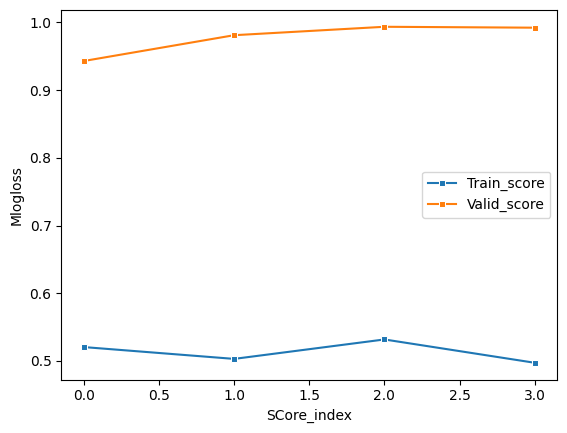

Avg Train Score 0.3530893828648652
Avg valid Score 0.988424115937427
accuracy_score- valid_oof 0.6123485736615866
cohen_kappa_score- valid_oof 0.5101105718548656
logloss- valid_oof 0.9884198523065992
accuracy_score- predictions 0.575
cohen_kappa_score- predictions 0.5499425947187141
logloss- predictions 0.9910277651613401


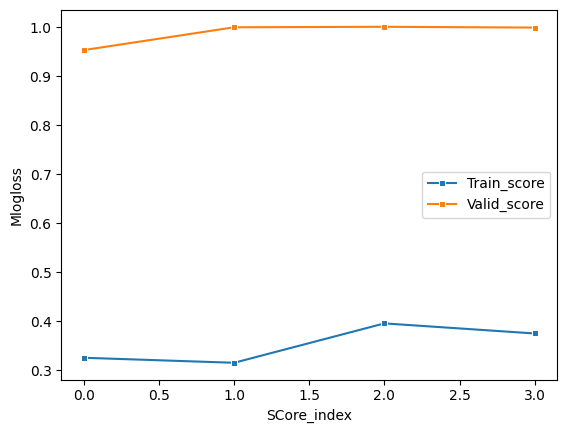

Avg Train Score 0.3735348778498882
Avg valid Score 0.9983541789762795
accuracy_score- valid_oof 0.6205549042594763
cohen_kappa_score- valid_oof 0.5241236531440314
logloss- valid_oof 0.9983501211935569
accuracy_score- predictions 0.5828125
cohen_kappa_score- predictions 0.5431777531549702
logloss- predictions 1.0054318307006873


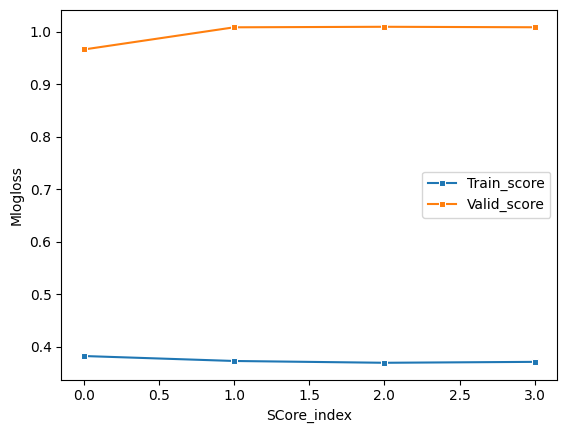

In [147]:
import xgboost as xgb


for params in params_hypertuned:

    predictions_prob=np.zeros((len(X_test),6))
    valid_oof_prob=np.zeros((len(X_train),6))
    
    cohen_kappa_scores_xgb=[]
    logloss_scores_xgb=[]
    train_score_xgb=[]
    valid_score_xgb=[]
    #feature_importance_xgb=pd.DataFrame()
    
    for i,(train_idx,valid_idx) in enumerate(cv.split(X_train,y_train)):
    
            evals_result={}
        
            params_1=params[1].copy()
            params_1['objective']='multi:softprob'
            params_1['verbosity']=0
            params_1['num_class']=6
            del params_1['n_estimators']
            
            training_dataset=xgb.DMatrix(X_train.iloc[train_idx],label=y_train.iloc[train_idx])
            validation_dataset=xgb.DMatrix(X_train.iloc[valid_idx],label=y_train.iloc[valid_idx])
    
            clf=xgb.train(params_1,dtrain=training_dataset,num_boost_round=params[1]['n_estimators'],evals=[(training_dataset,'training_dataset'),
                                                                                         (validation_dataset,'validation_dataset')],
                         verbose_eval=False,evals_result=evals_result,early_stopping_rounds=50)
    
            train_score_xgb.append(evals_result['training_dataset']['mlogloss'][clf.best_iteration-1])
            valid_score_xgb.append(evals_result['validation_dataset']['mlogloss'][clf.best_iteration-1])
    
            valid_oof_prob[valid_idx]=clf.predict(validation_dataset,iteration_range=(0,clf.best_iteration))
            predictions_prob=predictions_prob+clf.predict(xgb.DMatrix(X_test),iteration_range=(0,clf.best_iteration))
    
            # feature importance
            #fold_imp=pd.DataFrame()
            #fold_imp['Features']=X_train.columns
            #importance_dict = clf.get_score(importance_type='weight')
            #fold_imp['Importance'] = fold_imp['Features'].map(importance_dict).fillna(0)
            #fold_imp['Fold']=fold
            #feature_importance_xgb=pd.concat([feature_importance_xgb,fold_imp],axis=0)
    
    predictions_prob=predictions_prob/cv.n_splits
    predictions_prob=predictions_prob/np.sum(predictions_prob,axis=1,keepdims=True)
    predictions=np.argmax(predictions_prob,axis=1)
    valid_oof_prob=valid_oof_prob/np.sum(valid_oof_prob,axis=1,keepdims=True)
    valid_oof=np.argmax(valid_oof_prob,axis=1)
    print('Avg Train Score',np.mean(train_score_xgb))
    print('Avg valid Score',np.mean(valid_score_xgb))
    print('accuracy_score- valid_oof',accuracy_score(y_train,valid_oof))
    print('cohen_kappa_score- valid_oof',cohen_kappa_score(y_train,valid_oof,weights='quadratic'))
    print('logloss- valid_oof',log_loss(y_train,valid_oof_prob))
    print('accuracy_score- predictions',accuracy_score(y_test,predictions))
    print('cohen_kappa_score- predictions',cohen_kappa_score(y_test,predictions,weights='quadratic'))
    print('logloss- predictions',log_loss(y_test,predictions_prob))
    Score=pd.DataFrame({'Train_score':train_score_xgb,'Valid_score':valid_score_xgb})
    sns.lineplot(data=Score,x=Score.index,y='Train_score',label='Train_score',marker='s',ms=5)
    sns.lineplot(data=Score,x=Score.index,y='Valid_score',label='Valid_score',marker='s',ms=5)
    plt.xlabel('SCore_index')
    plt.ylabel('Mlogloss')
    plt.legend()
    plt.show()


### <u>Overall Model Performance<u>

The model demonstrates variability in performance across different folds, with notable observations in the following metrics:

- **Avg Train Score**: 
  - Ranges from 0.353 to 0.513, indicating different levels of model fitting across folds.
  
- **Avg Valid Score**: 
  - Spans from 0.977 to 0.998, with corresponding logloss values that suggest stable performance on the validation sets.
  
- **Accuracy**:
  - Validation accuracy is around 0.612 to 0.620, while prediction accuracy ranges from 0.571 to 0.582, indicating some fluctuations in generalization.
  
- **Cohen's Kappa**:
  - The validation Kappa scores (0.510 to 0.524) are consistent, showing moderate agreement, while prediction Kappa scores (0.531 to 0.549) show slight improvement, suggesting room for further enhancement in predictive consistency.

**Conclusion**: The model's performance is stable across folds, but there is a need to focus on balancing train and validation scores to improve overall generalization, particularly the Cohen's Kappa score on predictions, for better model effectiveness.


### <u>Model Eval using tuned hyperparameters through cross validation using XGB Library for a generalized evaluation on `Oversampled` sampled data set<u> 

Avg Train Score 0.549420008788397
Avg valid Score 0.9787601654661574
accuracy_score- valid_oof 0.6189917936694022
cohen_kappa_score- valid_oof 0.5215066503057513
logloss- valid_oof 0.9787536409013843
accuracy_score- predictions 0.578125
cohen_kappa_score- predictions 0.5389321750299999
logloss- predictions 0.9984475681020466


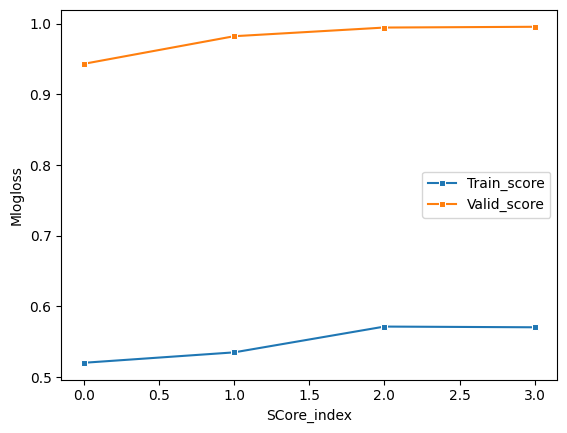

Avg Train Score 0.3758409791935807
Avg valid Score 0.988729508574228
accuracy_score- valid_oof 0.6107854630715123
cohen_kappa_score- valid_oof 0.5097037983593278
logloss- valid_oof 0.9887253631400302
accuracy_score- predictions 0.5734375
cohen_kappa_score- predictions 0.5491647178798291
logloss- predictions 0.9920816239774242


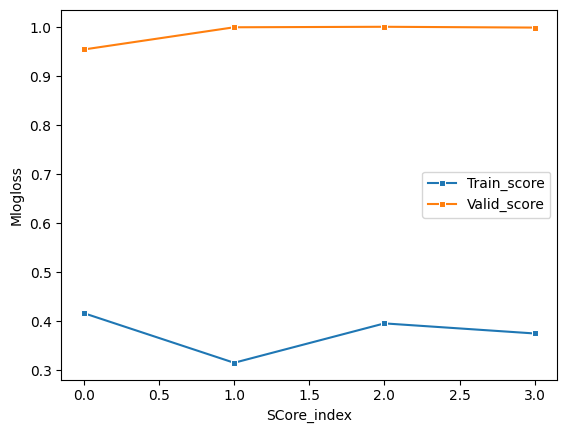

Avg Train Score 0.3735348778498882
Avg valid Score 0.9983541789762795
accuracy_score- valid_oof 0.6205549042594763
cohen_kappa_score- valid_oof 0.5241236531440314
logloss- valid_oof 0.9983501211935569
accuracy_score- predictions 0.5828125
cohen_kappa_score- predictions 0.5431777531549702
logloss- predictions 1.0054318307006873


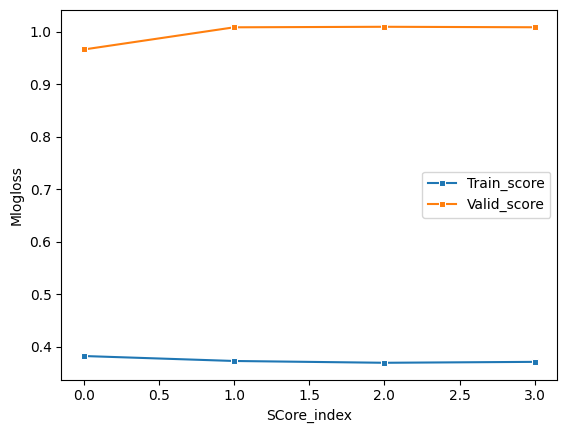

In [148]:
import xgboost as xgb


for params in params_hypertuned:

    predictions_prob=np.zeros((len(X_test),6))
    valid_oof_prob=np.zeros((len(X_train),6))
    
    cohen_kappa_scores_xgb=[]
    logloss_scores_xgb=[]
    train_score_xgb=[]
    valid_score_xgb=[]
    #feature_importance_xgb=pd.DataFrame()
    
    for i,(train_idx,valid_idx) in enumerate(cv.split(X_train,y_train)):
    
            evals_result={}
        
            params_1=params[1].copy()
            params_1['objective']='multi:softprob'
            params_1['verbosity']=0
            params_1['num_class']=6
            del params_1['n_estimators']
            
            training_dataset=xgb.DMatrix(X_train.iloc[train_idx],label=y_train.iloc[train_idx])
            validation_dataset=xgb.DMatrix(X_train.iloc[valid_idx],label=y_train.iloc[valid_idx])
    
            clf=xgb.train(params_1,dtrain=training_dataset,num_boost_round=params[1]['n_estimators'],evals=[(training_dataset,'training_dataset'),
                                                                                         (validation_dataset,'validation_dataset')],
                         verbose_eval=False,evals_result=evals_result,early_stopping_rounds=10)
    
            train_score_xgb.append(evals_result['training_dataset']['mlogloss'][clf.best_iteration-1])
            valid_score_xgb.append(evals_result['validation_dataset']['mlogloss'][clf.best_iteration-1])
    
            valid_oof_prob[valid_idx]=clf.predict(validation_dataset,iteration_range=(0,clf.best_iteration))
            predictions_prob=predictions_prob+clf.predict(xgb.DMatrix(X_test),iteration_range=(0,clf.best_iteration))
    
            # feature importance
            #fold_imp=pd.DataFrame()
            #fold_imp['Features']=X_train.columns
            #importance_dict = clf.get_score(importance_type='weight')
            #fold_imp['Importance'] = fold_imp['Features'].map(importance_dict).fillna(0)
            #fold_imp['Fold']=fold
            #feature_importance_xgb=pd.concat([feature_importance_xgb,fold_imp],axis=0)
    
    predictions_prob=predictions_prob/cv.n_splits
    predictions_prob=predictions_prob/np.sum(predictions_prob,axis=1,keepdims=True)
    predictions=np.argmax(predictions_prob,axis=1)
    valid_oof_prob=valid_oof_prob/np.sum(valid_oof_prob,axis=1,keepdims=True)
    valid_oof=np.argmax(valid_oof_prob,axis=1)
    print('Avg Train Score',np.mean(train_score_xgb))
    print('Avg valid Score',np.mean(valid_score_xgb))
    print('accuracy_score- valid_oof',accuracy_score(y_train,valid_oof))
    print('cohen_kappa_score- valid_oof',cohen_kappa_score(y_train,valid_oof,weights='quadratic'))
    print('logloss- valid_oof',log_loss(y_train,valid_oof_prob))
    print('accuracy_score- predictions',accuracy_score(y_test,predictions))
    print('cohen_kappa_score- predictions',cohen_kappa_score(y_test,predictions,weights='quadratic'))
    print('logloss- predictions',log_loss(y_test,predictions_prob))
    Score=pd.DataFrame({'Train_score':train_score_xgb,'Valid_score':valid_score_xgb})
    sns.lineplot(data=Score,x=Score.index,y='Train_score',label='Train_score',marker='s',ms=5)
    sns.lineplot(data=Score,x=Score.index,y='Valid_score',label='Valid_score',marker='s',ms=5)
    plt.xlabel('SCore_index')
    plt.ylabel('Mlogloss')
    plt.legend()
    plt.show()


### <u>Overall Model Performance<u>

The model's performance across different folds shows variations, highlighted by the following metrics:

- **Avg Train Score**:
  - Ranges from 0.373 to 0.549, indicating differences in model fitting across the training data.
  
- **Avg Valid Score**:
  - Spans from 0.978 to 0.998, with corresponding logloss values reflecting stable performance on validation sets.

- **Accuracy**:
  - Validation accuracy scores vary slightly, from 0.610 to 0.620, while prediction accuracy ranges from 0.573 to 0.582, indicating some inconsistency in generalization.
  
- **Cohen's Kappa**:
  - Validation Kappa scores (0.509 to 0.524) demonstrate moderate agreement, while prediction Kappa scores (0.538 to 0.549) show improvement, suggesting potential for enhanced predictive consistency.

**Conclusion**: The model trained using these folds displays stable performance, but there's a need for further tuning to balance train and validation scores. Improving the Cohen's Kappa score, especially on predictions, could lead to better model effectiveness and reliability.


In [4]:
lgb_reg={'n_estimators': 600, 'max_depth': 12, 'min_child_samples': 21.262024963527367, 'colsample_bytree': 0.8335340083575986, 'subsample': 0.944757166956307, 'reg_lambda': 0.8148026903158695, 'reg_alpha': 0.6986329003534865, 'learning_rate': 0.012887540978258586, 'min_data_in_leaf': 14}

In [5]:
xgb_reg_0={'colsample_bytree': 0.6037826904409286, 'learning_rate': 0.036730815675412025, 'max_depth': 18, 'min_child_samples': 33.41568417377974, 'min_child_weight': 6, 'min_data_in_leaf': 25.0, 'n_estimators': 360, 'reg_alpha': 0.10053205060658127, 'reg_lambda': 0.8832502198277543, 'subsample': 0.5686736682646627}

In [6]:
xgb_reg_1={'n_estimators': 240, 'max_depth': 15, 'min_child_samples': 16.165749872694477, 'colsample_bytree': 0.9620228560808628, 'subsample': 0.604176502754237, 'reg_lambda': 0.9992237674382431, 'reg_alpha': 0.35705349607957537, 'learning_rate': 0.015966287887070534, 'min_data_in_leaf': 33}

### Implementing a Voting Classifier with Hard Voting

In [188]:
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score,accuracy_score,log_loss


vtg_clf=VotingClassifier(estimators=[('lgb_reg',lgb.LGBMClassifier(random_state=42,**lgb_reg,verbosity=-1)),
                                     ('xgb_reg_0',xgb.XGBClassifier(random_state=42,**xgb_reg_0,verbosity=0)),
                                     ('xgb_reg_1',xgb.XGBClassifier(random_state=42,**xgb_reg_1,verbosity=0))],voting='hard')
vtg_clf.fit(X_train,y_train)
print('Accuracy_score-',accuracy_score(y_test,vtg_clf.predict(X_test)))
print('Cohen_kappa_score-',cohen_kappa_score(y_test,vtg_clf.predict(X_test),weights='quadratic'))
print(classification_report(y_test,vtg_clf.predict(X_test),zero_division=0))     


Accuracy_score- 0.5875
Cohen_kappa_score- 0.5603277854793329
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        18
           2       0.69      0.69      0.69       274
           3       0.49      0.62      0.55       230
           4       0.57      0.42      0.49       104
           5       1.00      0.11      0.20         9

    accuracy                           0.59       640
   macro avg       0.46      0.31      0.32       640
weighted avg       0.58      0.59      0.57       640



### Implementing a Voting Classifier with Soft Voting

In [189]:
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score,accuracy_score,log_loss


vtg_clf=VotingClassifier(estimators=[('lgb_reg',lgb.LGBMClassifier(random_state=42,**lgb_reg,verbosity=-1)),
                                     ('xgb_reg_0',xgb.XGBClassifier(random_state=42,**xgb_reg_0,verbosity=0)),
                                     ('xgb_reg_1',xgb.XGBClassifier(random_state=42,**xgb_reg_1,verbosity=0))],voting='soft')
vtg_clf.fit(X_train,y_train)
print('Accuracy_score-',accuracy_score(y_test,vtg_clf.predict(X_test)))
print('Cohen_kappa_score-',cohen_kappa_score(y_test,vtg_clf.predict(X_test),weights='quadratic'))
print(classification_report(y_test,vtg_clf.predict(X_test),zero_division=0))     


Accuracy_score- 0.5890625
Cohen_kappa_score- 0.5618824752990119
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        18
           2       0.69      0.69      0.69       274
           3       0.50      0.62      0.55       230
           4       0.58      0.43      0.49       104
           5       0.50      0.11      0.18         9

    accuracy                           0.59       640
   macro avg       0.38      0.31      0.32       640
weighted avg       0.57      0.59      0.58       640



### Implementing a Voting Classifier with Soft Voting and Explicitly Assigned Weights

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X=train_set.drop('quality',axis=1)
y=train_set['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

encoder_target=LabelEncoder()
y_train=encoder_target.fit_transform(y_train)
y_test=encoder_target.transform(y_test)
y_train=pd.Series(y_train)
y_test=pd.Series(y_test)


In [36]:
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score,accuracy_score,log_loss


vtg_clf=VotingClassifier(estimators=[('lgb_reg',lgb.LGBMClassifier(random_state=42,**lgb_reg,verbosity=-1)),
                                     ('xgb_reg_0',xgb.XGBClassifier(random_state=42,**xgb_reg_0,verbosity=0)),
                                     ('xgb_reg_1',xgb.XGBClassifier(random_state=42,**xgb_reg_1,verbosity=0))],voting='soft',weights=[1,3,2])
vtg_clf.fit(X_train,y_train)
print('Accuracy_score-',accuracy_score(y_test,vtg_clf.predict(X_test)))
print('Cohen_kappa_score-',cohen_kappa_score(y_test,vtg_clf.predict(X_test),weights='quadratic'))


Accuracy_score- 0.5953125
Cohen_kappa_score- 0.5678171080580009


### <u>BEST PERFORMING MODEL<u>

In [207]:
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score,accuracy_score,log_loss


vtg_clf=VotingClassifier(estimators=[('lgb_reg',lgb.LGBMClassifier(random_state=42,**lgb_reg,verbosity=-1)),
                                     ('xgb_reg_0',xgb.XGBClassifier(random_state=42,**xgb_reg_0,verbosity=0)),
                                     ('xgb_reg_1',xgb.XGBClassifier(random_state=42,**xgb_reg_1,verbosity=0))],voting='soft',weights=[1,3,2])
vtg_clf.fit(X_train,y_train)
print('Accuracy_score-',accuracy_score(y_test,vtg_clf.predict(X_test)))
print('Cohen_kappa_score-',cohen_kappa_score(y_test,vtg_clf.predict(X_test),weights='quadratic'))
print(classification_report(y_test,vtg_clf.predict(X_test),zero_division=0))     
y_predict=vtg_clf.predict(X_test)


Accuracy_score- 0.5953125
Cohen_kappa_score- 0.5678171080580009
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        18
           2       0.70      0.70      0.70       274
           3       0.50      0.63      0.56       230
           4       0.58      0.43      0.49       104
           5       1.00      0.11      0.20         9

    accuracy                           0.60       640
   macro avg       0.46      0.31      0.32       640
weighted avg       0.59      0.60      0.58       640



In [38]:
predictions_df=pd.DataFrame({'TEST':y_test,'PREDICT':y_predict})

In [40]:
predictions_df.to_csv('wine_predictions.csv')

### Implementing A Stacking Classifier

In [ ]:
# could try 
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import make_scorer

def kappa_score(y_true,y_pred):
    score=cohen_kappa_score(y_true,y_pred,weights='quadratic')
    return score

scorer=make_scorer(kappa_score)

cv=StratifiedKFold(n_splits=4,shuffle=True,random_state=42)

#using grid search

best_estimators=[('lgb_reg',lgb.LGBMClassifier(random_state=42,**lgb_reg,verbosity=-1)),
                                     ('xgb_reg_0',xgb.XGBClassifier(random_state=42,**xgb_reg_0,verbosity=0)),
                                     ('xgb_reg_1',xgb.XGBClassifier(random_state=42,**xgb_reg_1,verbosity=0))]


meta_models=[('lgb_reg',lgb.LGBMClassifier(random_state=42)),
                ('xgb_reg_0',xgb.XGBClassifier(random_state=42)),
                ('xgb_reg_1',xgb.XGBClassifier(random_state=42))]


meta_params={'lgb_reg':{'final_estimator__n_estimators':[],
                        'final_estimator__max_depth':[],
                        'final_estimator__min_samples_split':[]},
            'lgb_reg':{'final_estimator__n_estimators':[],
                        'final_estimator__max_depth':[],
                        'final_estimator__min_samples_split':[]},
            'lgb_reg':{'final_estimator__n_estimators':[],
                        'final_estimator__max_depth':[],
                        'final_estimator__min_samples_split':[]}}
best_meta_model=None
best_score=0

        
for index,meta_model in enumerate(meta_models):
    
    base_estimators=best_estimators.copy()
    
    del base_estimators[index]
                       
    st_clfr=StackingClassifiser(estimators=base_estimators,final_estimator=meta_model[1],cv=cv)
    grid_search=GridSearchCV(st_clfr,meta_params[meta_model[0]],cv=cv,n_jobs=-1,scoring=scorer)
    grid_search.fit(X_train,y_train)
    print('\n\n----------------------------')
    print('Meta_model-',meta_model[0])
    print(grid_search.best_params_)
    print('Accuracy_score-',accuracy_score(y_test,vtg_clf.predict(X_test)))
    print('Cohen_kappa_score-',cohen_kappa_score(y_test,vtg_clf.predict(X_test),weights='quadratic'))
    print(classification_report(y_test,vtg_clf.predict(X_test),zero_division=0))
    if grid_search.best_score_>best_score:
        best_score=grid_search.best_score_
        best_meta_model=meta_model[0]
